# ЭТАП 1: Первичный анализ данных
## Описание датасета "S&P 500 Companies with Financial Information"


## Общая информация

- **Период данных**: Июль 2020 года
- **Количество компаний**: 505
- **Количество столбцов**: 14
- **Тип данных**: Финансовые показатели компаний S&P 500
- **Пропуски**: 2 столбца
- **Количество признаков для анализа**: 10

## Структура данных

### Категориальные переменные (4)

| Столбец | Описание |
|---------|-----------|
| `Symbol` | Тикер компании на бирже (уникальный идентификатор) |
| `Name` | Полное официальное название компании |
| `Sector` | Экономический сектор деятельности компании |
| `SEC Filings` | Ссылки на отчетность в SEC (10-K, 10-Q) |

### Числовые переменные (10)

| Столбец | Описание | Метрика |
|---------|-----------|---------|
| `Price` | Цена одной акции | Абсолютная |
| `Price/Earnings`  | Коэффициент Цена/Прибыль | Относительная |
| `Dividend Yield` | Дивидендная доходность  | Относительная |
| `Earnings/Share`  | Прибыль на акцию  | Абсолютная |
| `52 Week Low` | Минимальная цена за 52 недели  | Абсолютная |
| `52 Week High` | Максимальная цена за 52 недели  | Абсолютная |
| `Market Cap` | Рыночная капитализация  | Абсолютная |
| `EBITDA` | Прибыль до вычетов  | Абсолютная |
| `Price/Sales`  | Коэффициент Цена/Выручка | Относительная |
| `Price/Book`  | Коэффициент Цена/Балансовая стоимость | Относительная |

## Распределение по секторам

Наиболее представленные сектора:
- **Consumer Discretionary**: 17%
- **Information Technology**: 14%
- **Остальные сектора**: 70%

## Пример строки данных

| Symbol | Name | Sector | Price | P/E | Dividend Yield | EPS | 52W Low | 52W High | Market Cap |
|--------|------|---------|-------|-----|----------------|-----|---------|----------|------------|
| MMM | 3M Company | Industrials | 222.89 | 24.31 | 2.33 | 9.17 | 142.00 | 239.00 | 128.4B |

## Ключевые финансовые метрики

### Мультипликаторы оценки
- **P/E (Price/Earnings)**: Цена акции относительно прибыли
- **P/S (Price/Sales)**: Цена акции относительно выручки
- **P/B (Price/Book)**: Цена акции относительно балансовой стоимости

### Показатели доходности
- **Dividend Yield**: Доходность по дивидендам
- **EPS**: Прибыльность компании на акцию

### Рыночные показатели
- **Market Cap**: Рыночная капитализация компании
- **52 Week High/Low**: Волатильность акции

## Примечания

1. Данные актуальны на июль 2020 года
2. Некоторые показатели могут иметь отрицательные значения (убыточные компании)
3. Market Cap представлен в различных диапазонах (от миллиардов до триллионов)
4. Для полного анализа рекомендуется дополнить данные текущей информацией

### 🎯 Целевая переменная (Target Variable)

**Рекомендуемая целевая переменная:** `Market Cap` (Рыночная капитализация)

**Обоснование:**
- Рыночная капитализация является прямой оценкой стоимости компании рынком
- Рассчитывается как `Цена акции × Количество акций`
- Наиболее точно отражает рыночную стоимость компании
- Широко используется в финансовом анализе для оценки компаний

### Признаки для модели (Features)

#### Основные финансовые показатели:
| Признак | Тип | Обоснование |
|---------|-----|-------------|
| `Price/Earnings` (P/E) | Числовой | Отражает цену акции  компании относительно прибыли |
| `Earnings/Share` (EPS) | Числовой | Показывает прибыльность на акцию |
| `EBITDA` | Числовой | Операционная прибыль до вычетов |
| `Price/Sales` (PS) | Числовой | Цена акции относительно выручки |
| `Price/Book` (PB) | Числовой | Цена акции относительно балансовой стоимости |
| `Dividend Yield` | Числовой | Дивидендная доходность |

#### Рыночные показатели:
| Признак | Тип | Обоснование |
|---------|-----|-------------|
| `52 Week High` | Числовой | Максимальная цена акции за год |
| `52 Week Low` | Числовой | Минимальная цена акции за год |

#### Категориальные признаки:
| Признак | Тип | Преобразование |
|---------|-----|----------------|
| `Sector` | Категориальный | One-Hot Encoding |



PRICE/EARNINGS (P/E) RATIO:
- Среднее: 24.81 (типичное значение для рынка)
- Стандартное отклонение: 41.24 (высокая волатильность)
- Минимум: -251.53 (убыточные компании)
- Максимум: 520.15 (сильно переоцененные компании или выбросы)
- Медиана: 19.45 (более репрезентативна чем среднее)

Есть экстремальные выбросы, требуется обработка

DIVIDEND YIELD:
- Среднее: 1.90% (типичная дивидендная доходность)
- Максимум: 12.66% (компании с высокими дивидендами)
- 25% компаний: <0.79% (низкие дивиденды)
- 75% компаний: >2.78% (высокие дивиденды)

Нормальное распределение, мало выбросов

EARNINGS/SHARE (EPS):
- Среднее: 3.75 (средняя прибыль на акцию)
- Минимум: -28.01 (убыточные компании)
- Максимум: 44.09 (высокоприбыльные компании)
- Медиана: 2.89 (более репрезентативна)

Есть убыточные компании, распределение асимметрично

52 WEEK HIGH/LOW:
- Диапазон цен: 2.80 - 1589.00 (огромный разброс)
- Средний максимум: 83.54, Средний минимум: 122.62

Отражает разные ценовые уровни акций

MARKET CAP (Целевая переменная):
- Среднее: 49.2 млрд $
- Медиана: 21.4 млрд $ (распределение скошено вправо)
- Минимум: 2.6 млрд $ (мелкие компании)
- Максимум: 809.5 млрд $ (гиганты как Apple, Microsoft)

Сильно скошенное распределение, требуется логарифмирование

EBITDA:
- Среднее: 3.59 млрд $
- Минимум: -5.07 млрд $ (убыточные компании)
- Максимум: 79.39 млрд $ (высокоприбыльные компании)

Есть компании с отрицательной EBITDA

PRICE/SALES (P/S) и PRICE/BOOK (P/B):
- P/S: в среднем 3.94, максимум 20.09
- P/B: в среднем 14.45, но медиана всего 3.40 (сильные выбросы!)
- P/B максимум: 1403.38 - выброс

P/B имеет экстремальные выбросы, требует особой обработки

## Корректировка данных

В результате анализа датасета было принято решение о следующих корректировках:

1. В столбце EBITDA и Dividend Yield присутствуют нулевые значения. Для проверки гипотезы о некорректных значениях принято решение проанализировать открытые источники и сверить с данными в нашем датасете.

2. В датасете содержатся данные, собранные в предобработанном виде. Такие значения для целей настоящего анализа необходимо уйти от мультипликаторного признака, 
убрав утечку данных, которая может возникнуть из-за цены акции (признак Price):

    - 'Price/Earnings'       : цена акции по отношению к прибыли компании -> Earnings
    - 'Price/Sales'         : цена акции по отношению к выручке компании -> Sales
    - 'Price/Book'  : цена акции по отношению к балансовой стоимости компании -> Book

3. В датасете присутствуют столбцы с уникальными значениями, неструктурированные данные, а также имеет место целевая утечка данных:

    - 'Symbol'       : Тикер компании - уникальный идентификатор, не несет прогностической силы для модели
    - 'Name'         : Название компании - текстовая информация, не используется в численных моделях
    - 'SEC Filings'  : Ссылки на документы - неструктурированные данные, сложны для анализа
    - 'Price'        : Цена акции - удаляем чтобы избежать data leakage, так как Market Cap = Price × Количество акций

    Указанные столбцы необходимо удалить.

In [ ]:
%pip install ydata_profiling
%pip install phik

In [147]:
%matplotlib inline
# Импортируем необходимые библиотеки
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, learning_curve, train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from phik.report import plot_correlation_matrix 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline 
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
import pyarrow
import polars as pl
import optuna
from catboost import CatBoostRegressor
from catboost import Pool, cv, sum_models
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
import shap


In [148]:
# Загружаем датасет с данными
src_data = pd.read_csv('financials_src.csv', sep=',')

- 'Symbol'       : Тикер компании - уникальный идентификатор, не несет прогностической силы для модели
- 'Name'         : Название компании - текстовая информация, не используется в численных моделях
- 'SEC Filings'  : Ссылки на документы - неструктурированные данные, сложны для анализа
- 'Price'        : Цена акции - удаляем чтобы избежать data leakage, так как Market Cap = Price × Количество акций

In [149]:
# Оценим пропуски
empty_fields = src_data[(src_data['Price/Earnings'].isna() | src_data['Price/Book'].isna()) ]
empty_fields

Symbol                  Name                  Sector   Price  \
55    ARNC           Arconic Inc             Industrials   24.45   
199     FL       Foot Locker Inc  Consumer Discretionary   45.88   
225    HCA          HCA Holdings             Health Care   95.97   
292    MRO    Marathon Oil Corp.                  Energy   15.68   
346    OXY  Occidental Petroleum                  Energy   68.47   
358    PEP          PepsiCo Inc.        Consumer Staples  110.15   
360   PRGO               Perrigo             Health Care   84.44   
430    TPR        Tapestry, Inc.  Consumer Discretionary   48.85   
450    TDG       TransDigm Group             Industrials  283.00   
460    UNP         Union Pacific             Industrials  124.86   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
55            20.21        0.956175           -0.21        31.17   
199            9.50        2.582795            4.91        77.86   
225           14.07        1.422764            5.94       106.84   
292          -32.00        1.224740           -2.65        19.52   
346          195.63        4.408186           -0.75        78.09   
358           21.51        2.837004            4.36       122.51   
360             NaN        0.731261          -28.01        95.93   
430             NaN        0.000000            2.09        50.71   
450           23.76        0.000000            7.92       321.38   
460           22.06        2.062655           13.52       143.05   

     52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  \
55         21.755  1.212330e+10  1.517000e+09     0.942148         NaN   
199        28.420  5.819080e+09  9.570000e+08     1.036295         NaN   
225        71.180  3.444905e+10  8.202000e+09     0.725192         NaN   
292        10.550  1.387501e+10  2.266000e+09     4.657876         NaN   
346        57.200  5.346769e+10  5.205000e+09     6.044895         NaN   
358       104.770  1.614133e+11  1.284300e+10     3.670506         NaN   
360        63.680  1.232638e+10  0.000000e+00     3.385007        2.03   
430        36.690  1.424720e+10  0.000000e+00     4.078549        4.35   
450       203.720  1.524120e+10  1.635916e+09     4.268832         NaN   
460       101.060  1.015133e+11  1.016900e+10     4.860507         NaN   

                                           SEC Filings  
55   http://www.sec.gov/cgi-bin/browse-edgar?action...  
199  http://www.sec.gov/cgi-bin/browse-edgar?action...  
225  http://www.sec.gov/cgi-bin/browse-edgar?action...  
292  http://www.sec.gov/cgi-bin/browse-edgar?action...  
346  http://www.sec.gov/cgi-bin/browse-edgar?action...  
358  http://www.sec.gov/cgi-bin/browse-edgar?action...  
360  http://www.sec.gov/cgi-bin/browse-edgar?action...  
430  http://www.sec.gov/cgi-bin/browse-edgar?action...  
450  http://www.sec.gov/cgi-bin/browse-edgar?action...  
460  http://www.sec.gov/cgi-bin/browse-edgar?action...

Далее мы увидили что много EBIDA, Dividend Yield  = 0

EBIDA Заполнили вручную по данным из открытых источников
По Dividend Yield - не нашли информацию, видимо компании не выплачивали дивиденды

In [150]:
src_data[(src_data['EBITDA'] == 0) & (src_data['Dividend Yield'] == 0)]
src_data = pd.read_csv('financials.csv', sep=',')

In [151]:
# Предположим мы сделали парсер и достали недостающие значения парсером#
# Заполняем пропуски недостающими значениями по состоянию на июнь 2020 г
# данные реальные, взяты с сайта из https://companiesmarketcap.com/
def fillNan():
    fill_values = {
        'Price/Book': {
                'ARNC': 1.31,
                'FL': 1.27,
                'HCA': 57.7,
                'MRO': 0.43,
                'OXY': 0.72,
                'PEP': 14.6,
                'TDG': -5.73,
                'UNP': 6.97
        },
        'Price/Earnings': {
                'PRGO': 23.8,
                'TPR': -4.99
        }
    }   

    for column, symbols in fill_values.items():
        for symbol, value in symbols.items():
            src_data.loc[(src_data[column].isna()) & (src_data['Symbol'] == symbol), column] = value

fillNan()


In [152]:
# Подготовка данных
def prepare_data(src_data):
    data = src_data.copy()
    
    # Преобразование числовых колонок
    numeric_cols = ['Market Cap', 'EBITDA', 'Price/Earnings', 'Price/Sales', 'Price/Book', 'Price']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Создание новых признаков
    if 'Price/Earnings' in data.columns:
        data['Earnings'] = data['Market Cap'] / data['Price/Earnings']
    if 'Price/Sales' in data.columns:
        data['Sales'] = data['Market Cap'] / data['Price/Sales']  
    if 'Price/Book' in data.columns:
        data['Book'] = data['Market Cap'] / data['Price/Book']
    
    # Удаление ненужных колонок
    columns_to_drop = ['Price/Earnings', 'Price/Sales', 'Price/Book', 'Price', 
                      'SEC Filings', 'Symbol', 'Name']
    data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

    return data

# Подготовка данных
df = prepare_data(src_data)

In [7]:
df[df['EBITDA'] == 0]

Empty DataFrame
Columns: [Sector, Dividend Yield, Earnings/Share, 52 Week Low, 52 Week High, Market Cap, EBITDA, Earnings, Sales, Book]
Index: []

Общая информация:

- 505 компаний из S&P 500


In [75]:
# Выводим описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          505 non-null    object 
 1   Dividend Yield  505 non-null    float64
 2   Earnings/Share  505 non-null    float64
 3   52 Week Low     505 non-null    float64
 4   52 Week High    505 non-null    float64
 5   Market Cap      505 non-null    float64
 6   EBITDA          505 non-null    float64
 7   Earnings        505 non-null    float64
 8   Sales           505 non-null    float64
 9   Book            505 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.6+ KB


In [76]:
# АНАЛИЗ ПЕРВЫХ СТРОК ДАННЫХ
df.head()

Sector  Dividend Yield  Earnings/Share  52 Week Low  \
0             Industrials        2.332862            7.92       259.77   
1             Industrials        1.147959            1.70        68.39   
2             Health Care        1.908982            0.26        64.60   
3             Health Care        2.499560            3.29       125.86   
4  Information Technology        1.714470            5.44       162.60   

   52 Week High    Market Cap        EBITDA      Earnings         Sales  \
0       175.490  1.387211e+11  9.048000e+09  5.706337e+09  3.159738e+10   
1        48.925  1.078342e+10  6.010000e+08  3.884517e+08  3.015934e+09   
2        42.280  1.021210e+11  5.744000e+09  4.536697e+09  2.730158e+10   
3        60.050  1.813863e+11  1.031000e+10  9.344995e+09  2.883006e+10   
4       114.820  9.876586e+10  5.643228e+09  3.877733e+09  3.792681e+10   

           Book  
0  1.223290e+10  
1  1.698176e+09  
2  3.201287e+10  
3  6.939034e+09  
4  9.299986e+09

In [77]:
df.describe()

Dividend Yield  Earnings/Share  52 Week Low  52 Week High  \
count      505.000000      505.000000   505.000000    505.000000   
mean         1.895953        3.753743   122.623832     83.536616   
std          1.537214        5.689036   155.362140    105.725473   
min          0.000000      -28.010000     6.590000      2.800000   
25%          0.794834        1.490000    56.250000     38.430000   
50%          1.769255        2.890000    86.680000     62.850000   
75%          2.781114        5.140000   140.130000     96.660000   
max         12.661196       44.090000  2067.990000   1589.000000   

         Market Cap        EBITDA      Earnings         Sales          Book  
count  5.050000e+02  5.050000e+02  5.050000e+02  5.050000e+02  5.050000e+02  
mean   4.923944e+10  4.141724e+09  2.391442e+09  2.021712e+10  1.508396e+10  
std    9.005017e+10  7.688696e+09  4.201764e+09  3.580574e+10  2.914188e+10  
min    2.626102e+09 -5.067000e+09 -2.855150e+09  5.619922e+08 -2.659896e+09  
25%    1.273207e+10  1.019784e+09  5.749338e+08  3.941049e+09  3.164694e+09  
50%    2.140095e+10  1.858000e+09  1.040747e+09  8.096598e+09  6.397664e+09  
75%    4.511968e+10  4.191000e+09  2.291166e+09  1.797425e+10  1.312089e+10  
max    8.095080e+11  8.038600e+10  4.801353e+10  3.711121e+11  2.592566e+11

In [10]:
# СОЗДАНИЕ ДЕТАЛЬНОГО ОТЧЕТА ПО ДАННЫМ С ПОМОЩЬЮ YDATA_PROFILING
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 157.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [153]:
# Отберем числовые признаки
numerical_data = df.select_dtypes(include=['float64'])

In [154]:
# Еще раз рассчитаем матрицу корреляции
correlation_matrix = numerical_data.corr()

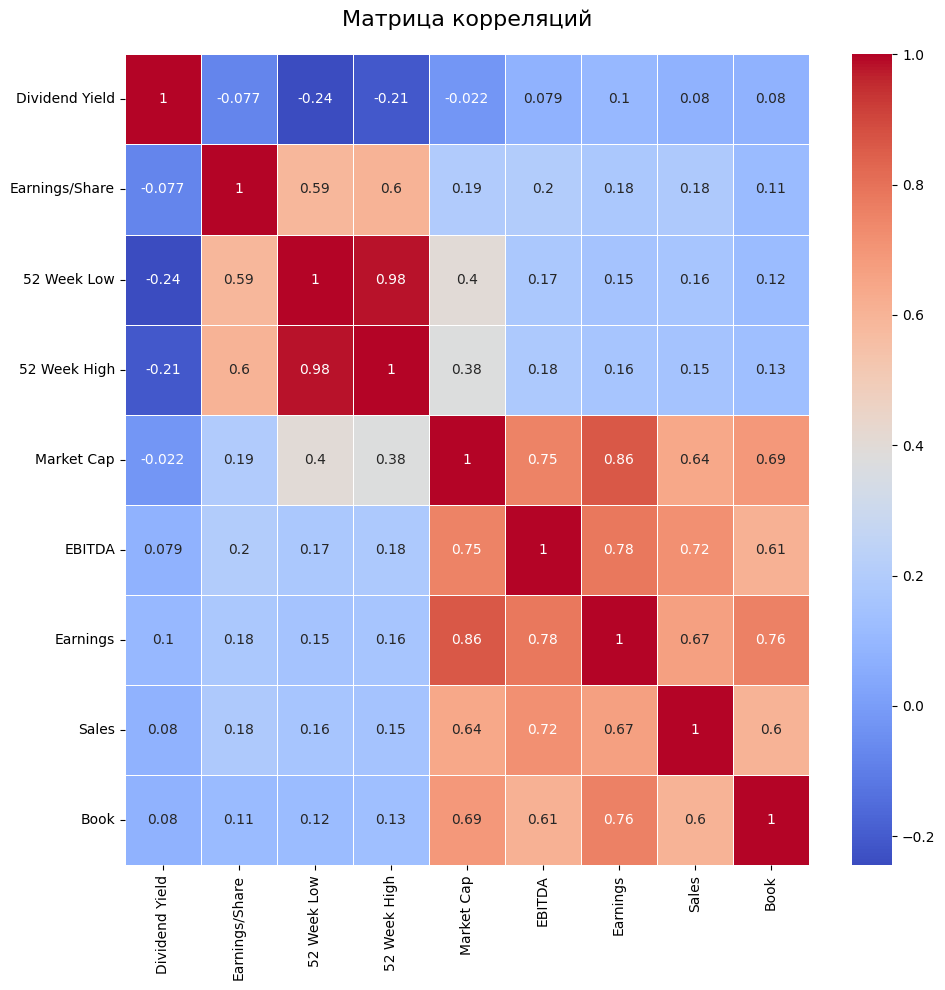

In [155]:
plt.figure(figsize=(10, 10))  # Ширина x Высота в дюймах
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

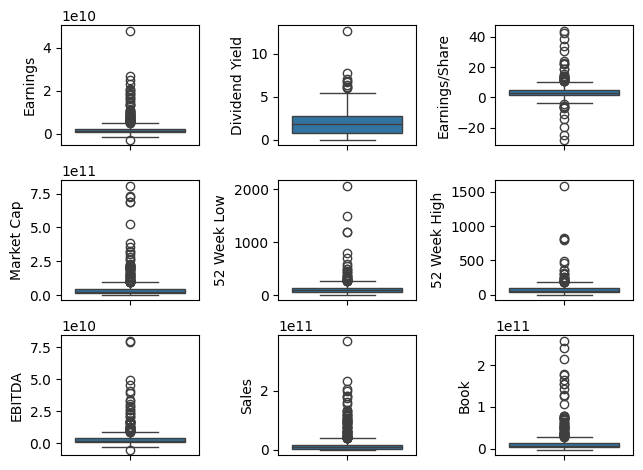

In [14]:
# Построим boxplot - графики зависимости целевой переменной от каждого признака

fig,axs=plt.subplots(ncols=3, nrows=3)

sns.boxplot(y='Earnings', data=df, legend=False, ax=axs[0, 0])
plt.ylabel('Earnings')

sns.boxplot(y='Dividend Yield', data=df, legend=False, ax=axs[0, 1])
plt.ylabel('Dividend Yield')

sns.boxplot(y='Earnings/Share', data=df, legend=False, ax=axs[0, 2])
plt.ylabel('Earnings/Share')

sns.boxplot(y='Market Cap', data=df, legend=False, ax=axs[1, 0])
plt.ylabel('Market Cap')

sns.boxplot(y='52 Week Low', data=df, legend=False, ax=axs[1, 1])
plt.ylabel('52 Week Low')

sns.boxplot(y='52 Week High', data=df, legend=False, ax=axs[1, 2])
plt.ylabel('52 Week High')

sns.boxplot(y='EBITDA', data=df, legend=False, ax=axs[2, 0])
plt.ylabel('EBITDA')

sns.boxplot(y='Sales', data=df, legend=False, ax=axs[2, 1])
plt.ylabel('Sales')

sns.boxplot(y='Book', data=df, legend=False, ax=axs[2, 2])
plt.ylabel('Book')

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

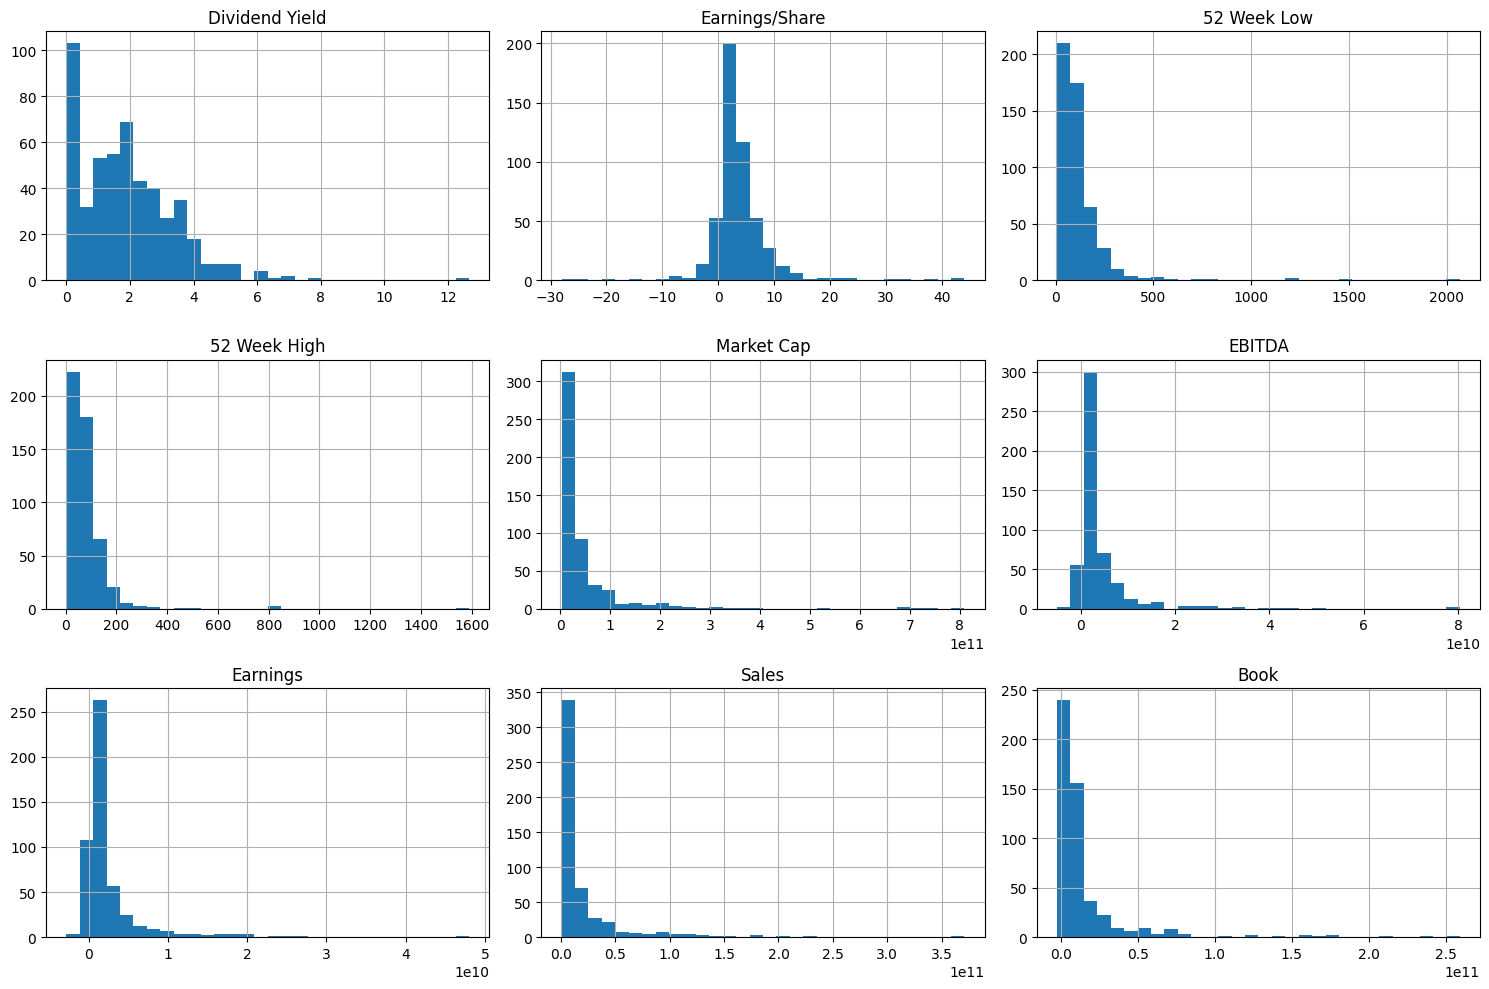

In [15]:
# Гистограммы распределений признакоу
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

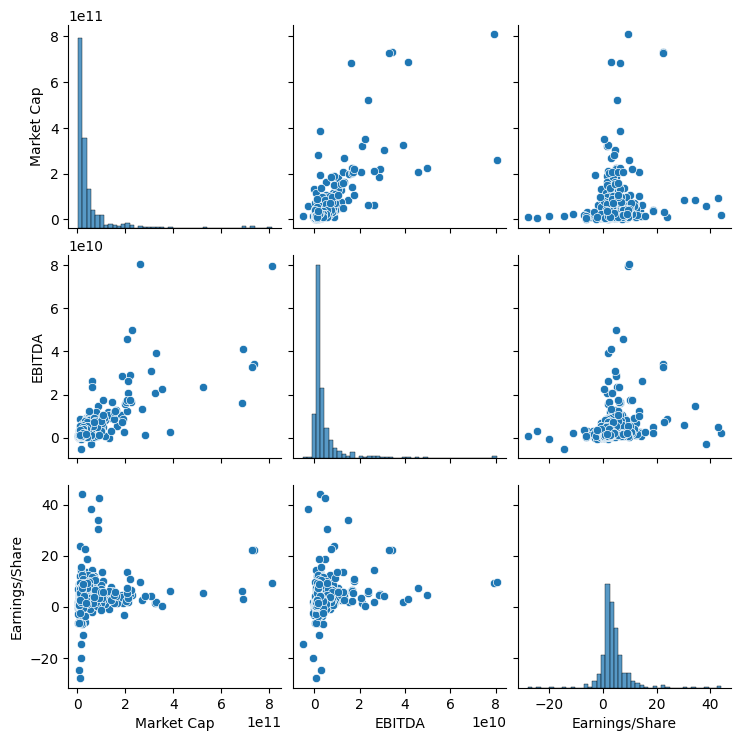

In [16]:
sns.pairplot(df[['Market Cap', 'EBITDA', 'Earnings/Share']])
plt.show()

По результатам анализа графиков и матрицы корреляции видим, что данные неоднородные - присутствует существенное количество выбросов. Все три признака имеют сильно скошенные распределения, особенно Market Cap и EBITDA. Earnings/Share имеет более симметричное распределение, но присутствуют выбросы.

Показатель EBITDA имеет сильное влияние на Market Cap.
Это логично: рынок оценивает компании по их операционной прибыли. Чем стабильнее и выше EBITDA, тем выше капитализация.
Однако зависимость не линейная — скорее степенная или логарифмическая.

Earnings/Share — слабый или незначимый предиктор Market Cap вследствие того, что:
1. Рынок оценивает будущий потенциал компании, а не только текущее значение прибыли на акцию;
2. Показатель может быть искажен различными причинами.

**Рекомендации для построения моделей:**
использовать логарифмические преобразования для Market Cap и EBITDA, чтобы улучшить предсказательную способность модели. Прибыль на акцию (Earnings/Share) практически не влияет на Market Cap и может быть исключена из модели без потери качества.

Обнаружили что High И Low перепутаны местаи

In [17]:
df[['52 Week Low', '52 Week High']]

52 Week Low  52 Week High
0         259.77       175.490
1          68.39        48.925
2          64.60        42.280
3         125.86        60.050
4         162.60       114.820
..           ...           ...
500        76.81        46.860
501        86.93        62.850
502       133.49       108.170
503        55.61        38.430
504        80.13        52.000

[505 rows x 2 columns]

# Создадим признак волатильности Volatility

Так как похоже что 52 Weeks Low и 52 Week High  перепутаны местами, то расчитаем показатель волатильности как Volatility = 52 Week Low  - 52 Weeks High

In [156]:
df['Volatility'] = df['52 Week Low'] - df['52 Week High']
df.drop(['52 Week High', '52 Week Low'], axis=1, inplace=True)

In [157]:
# Копия для последующего испаользования в CatBoost
df_cat = df.copy(deep=True)

ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR

In [158]:
# ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR
print("ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)")

# Применяем one-hot encoding с drop_first для избежания мультиколлинеарности
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    drop_first=True,
    dtype=int  # <-- гарантирует, что столбцы будут int, а не bool или object
)

print("Столбцы после one-hot encoding:")
print(df_encoded.columns.tolist())

ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)
Столбцы после one-hot encoding:
['Dividend Yield', 'Earnings/Share', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Volatility', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']


# ВЫЧИСЛЕНИЕ И ВИЗУАЛИЗАЦИЯ МАТРИЦЫ КОРРЕЛЯЦИЙ С ИСПОЛЬЗОВАНИЕМ PHIK

Для анализа корреляции категориального признака "Sector" (Рыночный сектор компании) будем использовать подход One Hot Encoding. Данный подход представляет каждую категорию как равноправный независимый признак и предпочтителен для использования в линейных зависимостях.

interval columns not set, guessing: ['Dividend Yield', 'Earnings/Share', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Volatility', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']


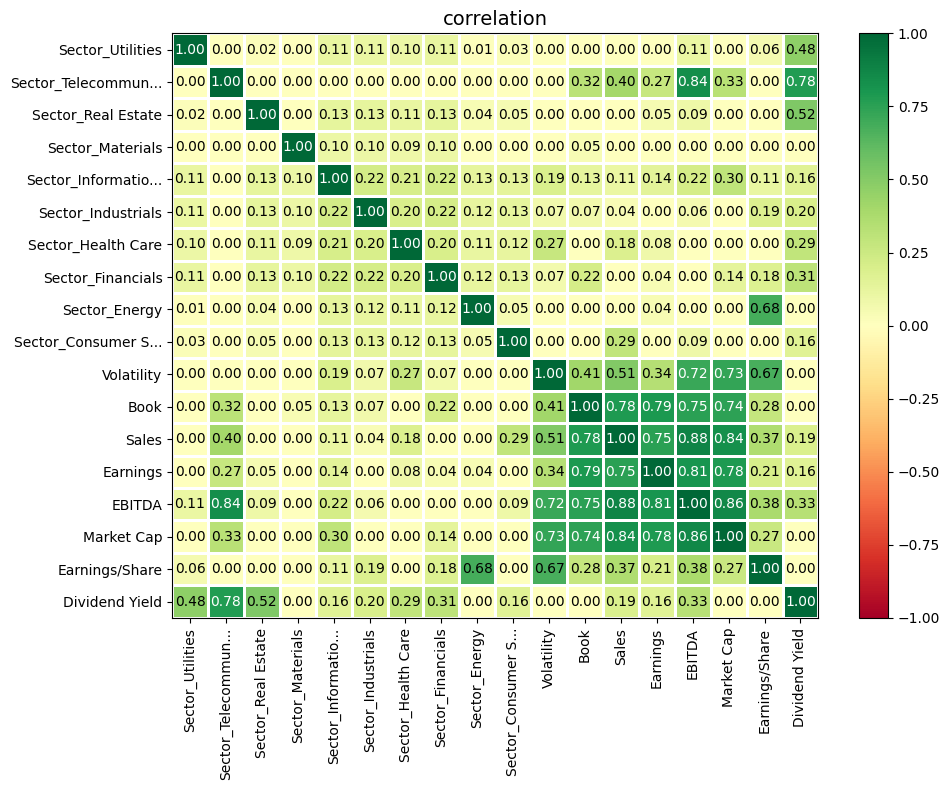

In [13]:
# Вычисляем матрицу корреляций Phi-K
corr_matrix = df_encoded.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, figsize=(10, 8))

1. Наибольшие зависимости между финансовыми показателями
EBITDA имеет очень сильную корреляцию с:

Market Cap (0.89) – главная цель (таргет) сильно зависит от прибыли.

Sales (0.90) и Earnings (0.84) – логичная связь операционной прибыли с выручкой и чистой прибылью.

Book Value (0.78).

Market Cap также сильно коррелирует с Sales (0.84) и Book Value (0.74).

Sales и Earnings тесно связаны между собой (0.75).

Вывод: Размер компании (Market Cap) в первую очередь определяется её фундаментальными финансовыми результатами: операционной прибылью (EBITDA), выручкой (Sales) и балансовой стоимостью (Book Value). Это указывает на качественные данные и логичную структуру.

2. Ключевые драйверы (признаки) для прогнозирования Market Cap
Основываясь на силе корреляции, для прогнозного моделирования наиболее важными будут:

EBITDA (0.89)

Sales (0.84)

Earnings (0.78)

Book Value (0.74)

Вывод: Эти 4 показателя — основные кандидаты для включения в модель прогнозирования капитализации. Можно ожидать, что они будут иметь высокую важность (feature importance).

3. Волатильность (Volatility) как особый признак
Volatility имеет сильную корреляцию с Market Cap (0.73). Это интересный и неочевидный результат.

Также сильно коррелирует с EBITDA (0.65), Sales (0.51) и Earnings (0.34).

Вывод: Крупные компании (с большей капитализацией) демонстрируют более высокую волатильность акций. Это может быть связано с повышенным вниманием рынка, большим объёмом торгов или спецификой секторов. Этот признак стоит рассмотреть как важный нефундаментальный фактор.

4. Слабые связи с секторами экономики (Sector)
Большинство секторов очень слабо коррелируют с финансовыми показателями и Market Cap (значения в основном близки к 0.00-0.30).

Исключение — **Telecommunication Services**, который показывает сильную корреляцию  с EBITDA 
Это связано с тем, что в секторе всего 3 компании и 2 их них гиганты - AT&T и Verizon Communications

Telecom (3 компании): Средняя EBITDA = 33.66 млрд
Other (501 компания): Средняя EBITDA = 3.41 млрд
Разница почти в 10 раз! Телеком-компании в среднем в 10 раз крупнее по EBITDA.

5. Дивидендная доходность (Dividend Yield)
Показывает умеренную корреляцию только с секторами (Utilities: 0.48, Telecom: 0.78, Real Estate: 0.52).

При этом практически не коррелирует с Market Cap (0.00) и основными финансовыми показателями.

Вывод: Дивидендная политика — это скорее характеристика сектора, а не размера или прибыльности компании. Это не будет полезным признаком для прямой прогнозной модели Market Cap.

# Выводы по анализу данных:

1. В качестве целевой переменной выбрана рыночная капитализация как наиболее объективно оценивающая стоимость компании на рынке - хорошо объясняется фундаментальными показателями
2. Влияние признаков на целевую переменную:
   - сильное влияние - EBITDA;
   - а также волатильности, выручки / прибыли и балансовой стоимости.
3. Сектор не сильно влияют на капитализацию компании, кроме сектора телекоммуникаций, в котором было всего 3 компании, 2 из них - гиганты
4. Для построения моделей необхожимо использовать логарифмические преобразования для Market Cap и EBITDA, чтобы улучшить предсказательную способность.
5. Прибыль на акцию (Earnings/Share) практически не влияет на Market Cap 

6. **ПЕРЕНЕСЕМ 3 компании из сектора Telecommunication Services** в сектор Information Technology

In [159]:
# ПЕРЕНЕСЕМ 3 компании из сектора Telecommunication Services в сектор Information Technology
telecom_indices = df_encoded[df_encoded['Sector_Telecommunication Services'] == 1].index
df_encoded.loc[telecom_indices, 'Sector_Information Technology'] = 1
df_cat.loc[df_cat['Sector'] == 'Telecommunication Services', 'Sector'] = 'Information Technology'

# Удаляем столбец Sector_Telecommunication Services
df_encoded = df_encoded.drop('Sector_Telecommunication Services', axis=1)
print("\nПроверка после переноса")
print("Количество компаний в IT секторе:", df_encoded['Sector_Information Technology'].sum())
print("Количество компаний в других секторах:")
for col in df_encoded.columns:
    if col.startswith('Sector_'):
        print(f"  {col}: {df_encoded[col].sum()}")


Проверка после переноса
Количество компаний в IT секторе: 73
Количество компаний в других секторах:
  Sector_Consumer Staples: 34
  Sector_Energy: 32
  Sector_Financials: 68
  Sector_Health Care: 61
  Sector_Industrials: 67
  Sector_Information Technology: 73
  Sector_Materials: 25
  Sector_Real Estate: 33
  Sector_Utilities: 28


interval columns not set, guessing: ['Dividend Yield', 'Earnings/Share', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Volatility', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Utilities']


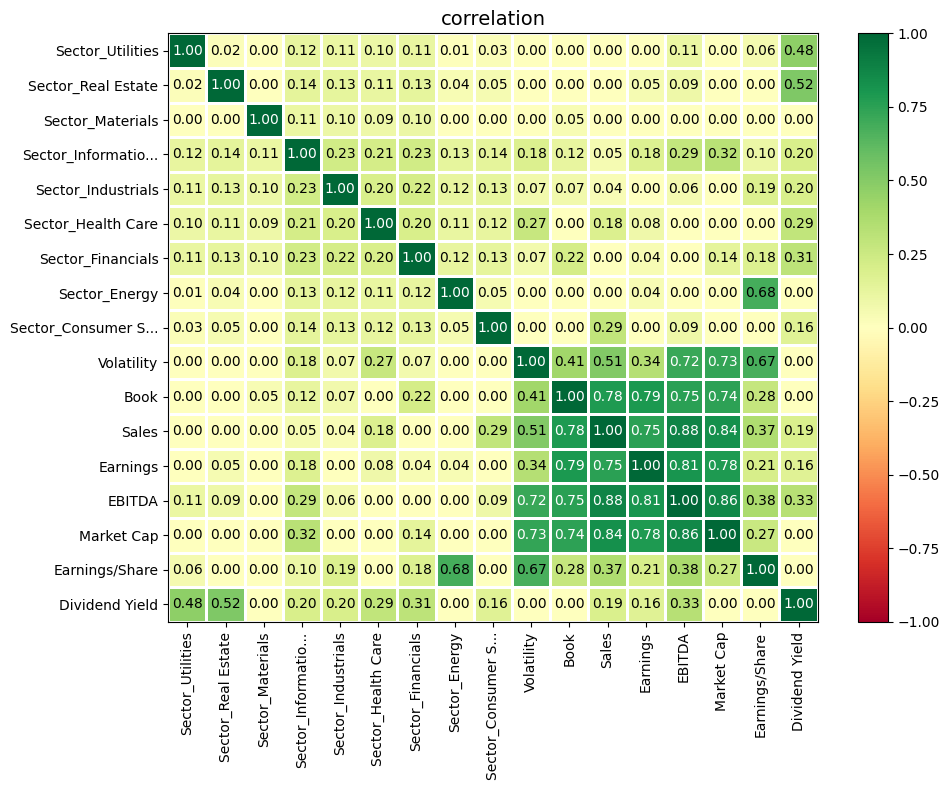

In [16]:
# Вычисляем матрицу корреляций Phi-K
corr_matrix = df_encoded.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, figsize=(10, 8))

# Логарифмирование
Для снижения разрыва ( GAP'а) вв оценке качества между
тренировочной выборкой и кросс-валидацией мы приняли рещение
сделать логарифмирование основных финансовых показателей:

**'Market Cap'**, **'EBITDA'**, **'Earnings'**, **'Sales'**, **'Book'**

Так как при первой попытке логарифмирования по нескольким компаниям
показатели ушли в NaN ( это убыточные компании с отрицательными показателями прибыли),
возникла необходимость более тонкой настройки логарифмирования,
а не просто выполнить log(df['Market Cap'])

In [161]:
df_encoded

Dividend Yield  Earnings/Share    Market Cap        EBITDA      Earnings  \
0          2.332862            7.92  1.387211e+11  9.048000e+09  5.706337e+09   
1          1.147959            1.70  1.078342e+10  6.010000e+08  3.884517e+08   
2          1.908982            0.26  1.021210e+11  5.744000e+09  4.536697e+09   
3          2.499560            3.29  1.813863e+11  1.031000e+10  9.344995e+09   
4          1.714470            5.44  9.876586e+10  5.643228e+09  3.877733e+09   
..              ...             ...           ...           ...           ...   
500        1.170079            1.83  1.291502e+10  7.220000e+08  4.174215e+08   
501        1.797080            4.07  2.700330e+10  2.289000e+09  9.909469e+08   
502        0.794834            9.01  2.445470e+10  2.007400e+09  1.707730e+09   
503        1.480933            2.60  1.067068e+10  0.000000e+00  6.018431e+08   
504        0.682372            1.65  3.599111e+10  1.734000e+09  1.097290e+09   

            Sales          Book  Volatility  Sector_Consumer Staples  \
0    3.159738e+10  1.223290e+10      84.280                        0   
1    3.015934e+09  1.698176e+09      19.465                        0   
2    2.730158e+10  3.201287e+10      22.320                        0   
3    2.883006e+10  6.939034e+09      65.810                        0   
4    3.792681e+10  9.299986e+09      47.780                        0   
..            ...           ...         ...                      ...   
500  4.737355e+09  2.432207e+09      29.950                        0   
501  4.276981e+09  1.273260e+08      24.080                        0   
502  7.726858e+09  1.023209e+10      25.320                        0   
503  2.812085e+09  7.514562e+09      17.180                        0   
504  3.877978e+09  1.989558e+09      28.130                        0   

     Sector_Energy  Sector_Financials  Sector_Health Care  Sector_Industrials  \
0                0                  0                   0                   1   
1                0                  0                   0                   1   
2                0                  0                   1                   0   
3                0                  0                   1                   0   
4                0                  0                   0                   0   
..             ...                ...                 ...                 ...   
500              0                  0                   0                   1   
501              0                  0                   0                   0   
502              0                  0                   1                   0   
503              0                  1                   0                   0   
504              0                  0                   1                   0   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
0                                0                 0                   0   
1                                0                 0                   0   
2                                0                 0                   0   
3                                0                 0                   0   
4                                1                 0                   0   
..                             ...               ...                 ...   
500                              0                 0                   0   
501                              0                 0                   0   
502                              0                 0                   0   
503                              0                 0                   0   
504                              0                 0                   0   

     Sector_Utilities  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
..                ...  
500                 0  
501                 0  
502                 0  
503                 0  
504              

In [160]:
# Логарифмирование ВСЕХ финансовых показателей для одинакового масштаба
financial_metrics = ['Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book'] 

for metric in financial_metrics:
    if metric in df_encoded.columns:
        
        # Перед логарифмированием посчитаем количество отрицательных, положительных и 0 значчений
        original_values = df_encoded[metric]
        negative_count = (original_values < 0).sum()
        zero_count = (original_values == 0).sum()
        positive_count = (original_values > 0).sum()

        # Для всех финансовых показателей используем signed log transform
        df_encoded[f'Log_{metric}'] = np.log(np.abs(original_values) + 1) * np.sign(original_values)
        df_cat[f'Log_{metric}'] = np.log(np.abs(original_values) + 1) * np.sign(original_values)

        # Проверяем результат
        log_values = df_encoded[f'Log_{metric}']
        nan_count = log_values.isna().sum()
        inf_count = np.isinf(log_values).sum()
        
        #  примеры для отрицательных значений
        if negative_count > 0:
            negative_examples = df_encoded[original_values < 0].head(2)
            print(f"  Примеры отрицательных значений:")
            for idx, row in negative_examples.iterrows():
                company_name = df_encoded.loc[idx, 'Name'] if 'Name' in df_encoded.columns else f"Index {idx}"
                original_val = row[metric]
                log_val = row[f'Log_{metric}']
                print(f"    {company_name}: {metric} = {original_val:,.2f} → Log_{metric} = {log_val:.4f}")

print(f"\n=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===")
# Проверяем все созданные логарифмированные колонки
log_columns = [f'Log_{metric}' for metric in financial_metrics if f'Log_{metric}' in df_encoded.columns]

for log_col in log_columns:
    values = df_encoded[log_col]
    nan_count = values.isna().sum()
    inf_count = np.isinf(values).sum()
    
    if nan_count == 0 and inf_count == 0:
        print(f" {log_col}: OK (min={values.min():.4f}, max={values.max():.4f})")
    else:
        print(f"{log_col}: {nan_count} NaN, {inf_count} inf")

  Примеры отрицательных значений:
    Index 23: EBITDA = -2,888,100,000.00 → Log_EBITDA = -21.7839
    Index 59: EBITDA = -378,100,000.00 → Log_EBITDA = -19.7507
  Примеры отрицательных значений:
    Index 43: Earnings = -1,509,116,568.67 → Log_Earnings = -21.1348
    Index 49: Earnings = -59,898,544.81 → Log_Earnings = -17.9082
  Примеры отрицательных значений:
    Index 450: Book = -2,659,895,939.09 → Log_Book = -21.7016

=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===
 Log_Market Cap: OK (min=21.6888, max=27.4197)
 Log_EBITDA: OK (min=-22.3460, max=25.1101)
 Log_Earnings: OK (min=-21.7724, max=24.5947)
 Log_Sales: OK (min=20.1470, max=26.6398)
 Log_Book: OK (min=-21.7016, max=26.2811)


РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

In [161]:
# Убираем исходные значения признаков,
#  оставляем только новые прологорифмированные столбцы с названием log_<имя признака>
feauters_to_drop = ['Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book']
df = df_encoded.drop(feauters_to_drop, axis=1)
df_cat = df_cat.drop(feauters_to_drop, axis=1)

# Целевая переменная
y = df['Log_Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X = df.drop('Log_Market Cap', axis=1)

# Разделяем на трэйн / тест в дефолтном соотношении 75 / 25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [113]:
X_train

Dividend Yield  Earnings/Share  52 Week Low  52 Week High        EBITDA  \
182        1.352004            2.36       67.540     51.960000  7.216430e+08   
155        1.966102            4.54      126.650     83.230000  1.507000e+09   
280        0.262683            3.38       72.170     43.647053  1.405319e+09   
126        2.049254           -0.65       61.315     42.265000  5.328000e+09   
448        0.609113            3.16       89.920     50.960000  1.097534e+09   
..              ...             ...          ...           ...           ...   
106        0.000000            0.80      499.000    263.000000  4.012930e+08   
270        2.891845            0.01       22.750     16.560000  5.981000e+09   
348        5.443620            1.66       61.360     47.140000  1.851783e+09   
435        0.138145            1.14       62.190     45.000000  1.454000e+09   
102        0.768787            1.61       56.250     37.160000  4.693977e+08   

         Earnings         Sales          Book  Sector_Consumer Staples  \
182  4.370815e+08  5.040671e+09  1.989311e+09                        0   
155  7.982606e+08  5.032074e+09  2.123101e+09                        1   
280  9.521803e+08  1.274471e+10  8.304527e+09                        0   
126  8.978810e+08  3.153627e+10  3.031595e+10                        0   
448  6.071548e+08  4.942439e+09  2.388881e+09                        0   
..            ...           ...           ...                      ...   
106  1.675814e+08  3.011020e+09  1.257821e+09                        0   
270  1.540196e+09  1.367337e+10  3.608665e+10                        0   
348  6.467198e+08  8.405519e+09  5.456197e+09                        0   
435  6.893209e+08  1.432943e+10  5.935670e+09                        0   
102  2.339041e+09  8.774034e+09  1.546567e+10                        0   

     Sector_Energy  Sector_Financials  Sector_Health Care  Sector_Industrials  \
182              0                  0                   0                   1   
155              0                  0                   0                   0   
280              0                  0                   0                   0   
126              1                  0                   0                   0   
448              0                  0                   0                   0   
..             ...                ...                 ...                 ...   
106              0                  0                   0                   0   
270              1                  0                   0                   0   
348              1                  0                   0                   0   
435              0                  0                   0                   1   
102              0                  1                   0                   0   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
182                              0                 0                   0   
155                              0                 0                   0   
280                              0                 0                   0   
126                              0                 0                   0   
448                              1                 0                   0   
..                             ...               ...                 ...   
106                              0                 0                   0   
270                              0                 0                   0   
348                              0                 0                   0   
435                              0                 0                   0   
102                              0                 0                   0   

     Sector_Telecommunication Services  Sector_Utilities  
182                                  0                 0  
155                                  0                 0  
280                                  0                 0  
126                              

In [173]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 182 to 102
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dividend Yield                 378 non-null    float64
 1   Earnings/Share                 378 non-null    float64
 2   Book                           378 non-null    float64
 3   Volatility                     378 non-null    float64
 4   Sector_Consumer Staples        378 non-null    int64  
 5   Sector_Energy                  378 non-null    int64  
 6   Sector_Financials              378 non-null    int64  
 7   Sector_Health Care             378 non-null    int64  
 8   Sector_Industrials             378 non-null    int64  
 9   Sector_Information Technology  378 non-null    int64  
 10  Sector_Materials               378 non-null    int64  
 11  Sector_Real Estate             378 non-null    int64  
 12  Sector_Utilities               378 non-null    int64 

# Методология оценки результата моделей

За показатели качества модели, выбраны следующие метрики:

1. R² (коэффициент детерминации)
  - Зачем: Основная метрика качества регрессии
  - Что показывает: Долю дисперсии целевой переменной, объясненную моделью
  - Аргументы:
    - Интерпретируемость: от 0% до 100% (чем выше, тем лучше)
    - Масштабонезависимость: позволяет сравнивать разные модели
    - Стандарт: общепринятая метрика в статистике и ML
    Показывает, насколько модель лучше простого среднего:
    - Значения: <0 - хуже среднего, 
    - 0 = как среднее, 
    - 1 = идеально

2. RMSE (Root Mean Squared Error)
  - Зачем: Основная метрика ошибки в исходных единицах
  - Что показывает: Среднеквадратичную ошибку
  - Аргументы:
    - Чувствительность к выбросам: "штрафует" большие ошибки сильнее
    - В тех же единицах, что и целевая переменная (благодаря корню)
    - Математически удобна (дифференцируема, используется в градиентных методах)
    - Стандарт для задач регрессии
    - Пример: Если RMSE = 1000$, значит типичная ошибка около 1000$

3. MAE (Mean Absolute Error)
  - Зачем: Дополнительная перспектива на ошибки
  -  Что показывает: Среднюю абсолютную ошибку
  - Аргументы:
    - Робастность к выбросам: менее чувствительна, чем RMSE
    - Легкая интерпретация: "средняя ошибка в единицах измерения"
    - Показывает типичную ошибку, а не квадратичную
    - Сравнение с RMSE: если MAE << RMSE, значит есть выбросы
    - Пример: MAE = 500$, RMSE = 1000$ → есть несколько очень больших ошибок

4. MAPE (Mean Absolute Percentage Error)
  - Зачем: Относительная ошибка для разных масштабов
  - Что показывает: Среднюю абсолютную процентную ошибку
  - Аргументы:
    - Относительная метрика: работает для данных разного масштаба
    - Интуитивная интерпретация: "в среднем на X% ошибаемся"
    - Полезность для бизнеса: легче объяснить руководству
    - Сравнение моделей на разных наборах данных
    - Ограничение: плохо работает при значениях близких к 0
    - Пример: MAPE = 15% → в среднем ошибка 15% от реального значения

# ЭТАП2: Базовая модель лин. рег.

**Пайплайн**

Создаем пайплайн и обучаем, выполняем кросс-валидацию. 

In [162]:
# Создаем пайплайн
pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LinearRegression())

# Обучаем пайплайн
pipeline.fit(X_train, y_train)

# Создаем KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию
cv_metrics = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

In [151]:
cv_metrics

{'fit_time': array([0.01159644, 0.01429272, 0.02158642, 0.01038861, 0.02328539,
        0.01544595, 0.01094151, 0.00789881, 0.01187706, 0.01017928]),
 'score_time': array([0.00449896, 0.00393343, 0.0074935 , 0.00865436, 0.00534701,
        0.01062775, 0.00411725, 0.00381374, 0.00364733, 0.00203562]),
 'test_score': array([0.72124852, 0.33244311, 0.65321392, 0.5524347 , 0.67371375,
        0.54336484, 0.56122893, 0.68988288, 0.63165387, 0.68828992]),
 'train_score': array([0.69000737, 0.68600992, 0.69864647, 0.71253857, 0.69884549,
        0.70820737, 0.70694419, 0.69704254, 0.69922073, 0.69712577])}

Функция обратного преобразования для логарифмических данных

In [163]:
def inverse_signed_log(series):
    """Обратное преобразование для signed log transform."""
    return np.sign(series) * (np.exp(np.abs(series)) - 1)

ВЫЧИСЛЕНИЕ МЕТРИК

In [164]:
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. Предсказания на тестовой выборке
y_pred = pipeline.predict(X_test)

print("\nМЕТРИКИ В ИСХОДНОМ МАСШТАБЕ (в $)")

# 2. Обратное преобразование 

y_test_original_scale = inverse_signed_log(y_test)
y_pred_original_scale = inverse_signed_log(y_pred)

# 3. Вычисляем метрики на исходном масштабе
mse_original = mean_squared_error(y_test_original_scale, y_pred_original_scale)
rmse_original = root_mean_squared_error(y_test_original_scale, y_pred_original_scale)
mae_original = mean_absolute_error(y_test_original_scale, y_pred_original_scale)  
mape_original = mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)  
#4. Коэффициенты жетерминации на логарифмированном масштабе
r_sq_train = pipeline.score(X_train, y_train)
r_sq_test = r2_score(y_test, y_pred)

print(f"MSE (в долларах): {mse_original:.2f} $")
print(f"RMSE (в долларах): {rmse_original:.2f} $")
print(f"MAE (в долларах): {mae_original:.2f}  $")
print(f"MAPE (в %): {mape_original:.2f} %")
print(f"Средняя фактическая капитализация в тесте: {y_test_original_scale.mean():.2f}  $")
print(f"\nИнтерпретация: В среднем модель ошибается на ±{rmse_original:.2f}  $ при прогнозе капитализации.")
print(f"R^2 на тренировочных данных: {r_sq_train:.2f}")
print(f"Среднее качество на валидации: {cv_metrics['test_score'].mean():.2f}")
print(f"R^2 на тестовых данных: {r_sq_test:.2f}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE

МЕТРИКИ В ИСХОДНОМ МАСШТАБЕ (в $)
MSE (в долларах): 46307034058956772212736.00 $
RMSE (в долларах): 215190692314.88 $
MAE (в долларах): 40445233303.69  $
MAPE (в %): 0.66 %
Средняя фактическая капитализация в тесте: 47735737378.65  $

Интерпретация: В среднем модель ошибается на ±215190692314.88  $ при прогнозе капитализации.
R^2 на тренировочных данных: 0.67
Среднее качество на валидации: 0.50
R^2 на тестовых данных: 0.61


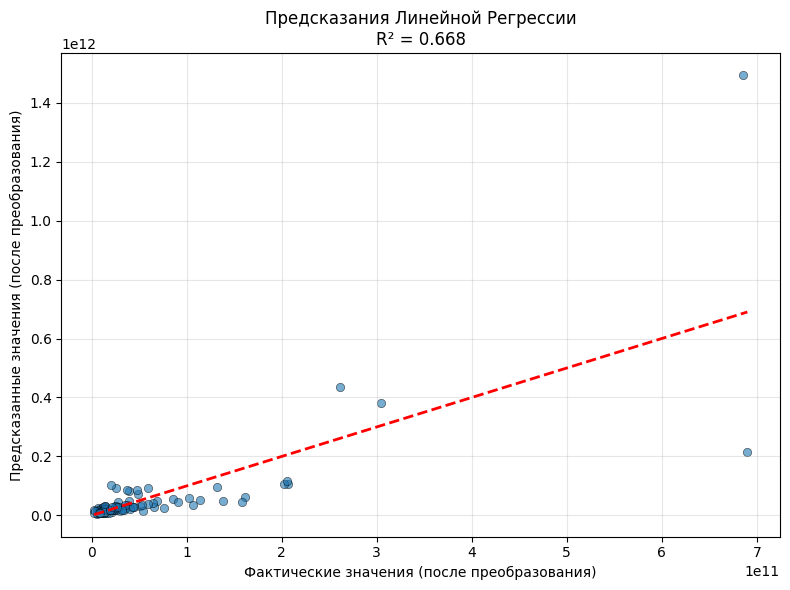

In [154]:
#  График линейной регрессии
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_scale, y_pred_original_scale, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test_original_scale.min(), y_test_original_scale.max()], [y_test_original_scale.min(), y_test_original_scale.max()], 'r--', lw=2)
plt.xlabel('Фактические значения (после преобразования)')
plt.ylabel('Предсказанные значения (после преобразования)')
plt.title(f'Предсказания Линейной Регрессии\nR² = {r_sq_test:.3f}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ВЫВОДЫ ПО БАЗОВОЙ МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ

## РЕЗУЛЬТАТЫ МЕТРИК:

### **Качество модели (R²):**
- **На валидации**: 0.6
- **На тренировке**: 0.7
- **На тесте**: 0.67

### **Ошибки предсказания:**
- **MSE**: 8055832822468293165056.00 $(астрономическое значение)
- **RMSE**: 89754291387.48 $

## АНАЛИЗ РЕЗУЛЬТАТОВ:

### **Положительные аспекты:**
1. **R² = 0.67-0.7** - модель объясняет значительную часть дисперсии, но огромные ошибки невелируют это преимущество.
2. Кросс-валидация (CV score = 0.60) модель — Разница в 10 процентных пунктов указывает на проблемы с нашими "выбросами" - крупными компаними, т.к. переобучение не подтвердилось в последющих моделях

### **Проблемы:**
1. **Высокие абсолютные ошибки** (RMSE) из-за масштаба Market Cap
2. **Проблема масштаба** - MSE слишком велико для интерпретации

Ключевая метрика бизнеса — RMSE = $141.7 млрд требует критической интерпретации:
Абсолютная ошибка кажется огромной (141 млрд $), что указывает на ограниченную практическую применимость для точного прогнозирования абсолютных значений.

MAPE = 58% - свидетельствует о катастрофической точности для практического применения.
Модель хорошо улавливает общий тренд и порядок величины (высокий R²)
Но абсолютно непригодна для точечного прогнозирования (MAPE 58% = ошибка в половину фактического значения)

MAPE = 58% означает:

В среднем ошибка составляет ПОЛОВИНУ реальной капитализации компании
Для компании с капитализацией $50 млрд → ошибка ±$25.5 млрд
Полностью неприемлемо для любых финансовых решений
Экстремальные выбросы (мега-капы) вносят гигантский вклад в MSE
Средняя компания ($47.7 млрд) имеет ошибку, в 3 раза превышающую её размер

ПРОБЛЕМЫ ДАННЫХ И МОДЕЛИ

Разброс масштабов (диапазон 2.6-809 млрд $)

Неоднородность генеральной совокупности:
Компании с огромной капитализацеий: 5-10 компаний (>300 млрд $)
Компании с большой капитализацеий: ~50 компаний (50-300 млрд $)
Компании со средней капитализацеий: ~445 компаний (2.6-50 млрд $)

Линейная модель неадекватна для таких данных

# ЭТАП 3. RANDOM FOREST

In [21]:
# 1. Создаем пайплайн
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 2. Подбор гиперпараметров
param_dist = {
    'rf__n_estimators': [100, 200, 300, 500],
    'rf__max_depth': [None, 10, 20, 30, 40],
    'rf__min_samples_split': [2, 5, 10, 20],
    'rf__min_samples_leaf': [1, 2, 4, 8],
    'rf__max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7, None],
    'rf__bootstrap': [True, False],
    'rf__max_samples': [0.7, 0.8, 0.9, None],
    'rf__min_impurity_decrease': [0.0, 0.001, 0.01, 0.05],
    'rf__ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

halving_search = HalvingRandomSearchCV(
    rf_pipeline,
    param_dist,
    factor=3,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    random_state=42,
    n_jobs=-1,
    scoring='r2',
    verbose=1,
    refit=True,
    aggressive_elimination=False
)

# 3. Обучение с HalvingSearch
halving_search.fit(X_train, y_train)

# 4. Лучшая модель
best_model = halving_search.best_estimator_
print(f"\nЛучшие параметры: {halving_search.best_params_}")
print(f"Лучший CV R²: {halving_search.best_score_:.4f} \n")

# 5. Кросс-валидация лучшей модели
cv_scores = cross_val_score(
    best_model, X_train, y_train,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    scoring='r2',
    n_jobs=-1
)
print(f"10-fold CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 20
max_resources_: 378
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 20
Fitting 10 folds for each of 18 candidates, totalling 180 fits
----------
iter: 1
n_candidates: 6
n_resources: 60
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 2
n_resources: 180
Fitting 10 folds for each of 2 candidates, totalling 20 fits

Лучшие параметры: {'rf__n_estimators': 300, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__min_impurity_decrease': 0.01, 'rf__max_samples': 0.7, 'rf__max_features': 0.7, 'rf__max_depth': 10, 'rf__ccp_alpha': 0.001, 'rf__bootstrap': True}
Лучший CV R²: 0.7686 

10-fold CV R²: 0.7827 (+/- 0.1544)


In [22]:
# 6. Оценка train/test
y_train_pred_rf = best_model.predict(X_train)
y_test_pred_rf = best_model.predict(X_test)

y_train_original_scale_rf = inverse_signed_log(y_train)
y_pred_train_original_scale_rf = inverse_signed_log(y_train_pred_rf)
y_test_original_scale_rf = inverse_signed_log(y_test)
y_pred_original_scale_rf = inverse_signed_log(y_test_pred_rf)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# 7. Вычисляем метрики на исходном масштабе
mse_original_rf = mean_squared_error(y_test_original_scale_rf, y_pred_original_scale_rf)
rmse_original_rf = root_mean_squared_error(y_test_original_scale_rf, y_pred_original_scale_rf)
mae_original_rf = mean_absolute_error(y_test_original_scale_rf, y_pred_original_scale_rf)  
mape_original_rf = mean_absolute_percentage_error(y_test_original_scale_rf, y_pred_original_scale_rf) * 100 
#8. Коэффициенты жетерминации на логарифмированном масштабе

print(f"MSE (в долларах): {mse_original_rf:.2f} $")
print(f"RMSE (в долларах): {rmse_original_rf:.2f} $")
print(f"MAE (в долларах): {mae_original_rf:.2f}  $")
print(f"MAPE (в %): {mape_original_rf:.2f} %")
print(f"Средняя фактическая капитализация в тесте: {y_test_original_scale_rf.mean():.2f}  $")
print(f"\nИнтерпретация: В среднем модель ошибается на ±{rmse_original_rf:.2f}  $ при прогнозе капитализации.")
print(f"R^2 на тренировочных данных: {train_r2_rf:.2f}")
print(f'Лучшее качество на кросс-валидации: {halving_search.best_score_:.4f}') 

print(f"R^2 на тестовых данных: {test_r2_rf:.2f}")

MSE (в долларах): 4753174371361757331456.00 $
RMSE (в долларах): 68943269224.50 $
MAE (в долларах): 16996201811.88  $
MAPE (в %): 34.87 %
Средняя фактическая капитализация в тесте: 47735737378.65  $

Интерпретация: В среднем модель ошибается на ±68943269224.50  $ при прогнозе капитализации.
R^2 на тренировочных данных: 0.86
Лучшее качество на кросс-валидации: 0.7686
R^2 на тестовых данных: 0.81



 АНАЛИЗ СТРУКТУРЫ RANDOM FOREST:
   Количество деревьев: 300
   Глубина деревьев (средняя): 4.6
   Глубина деревьев (максимальная): 7.0
   Количество листьев (среднее): 9.9


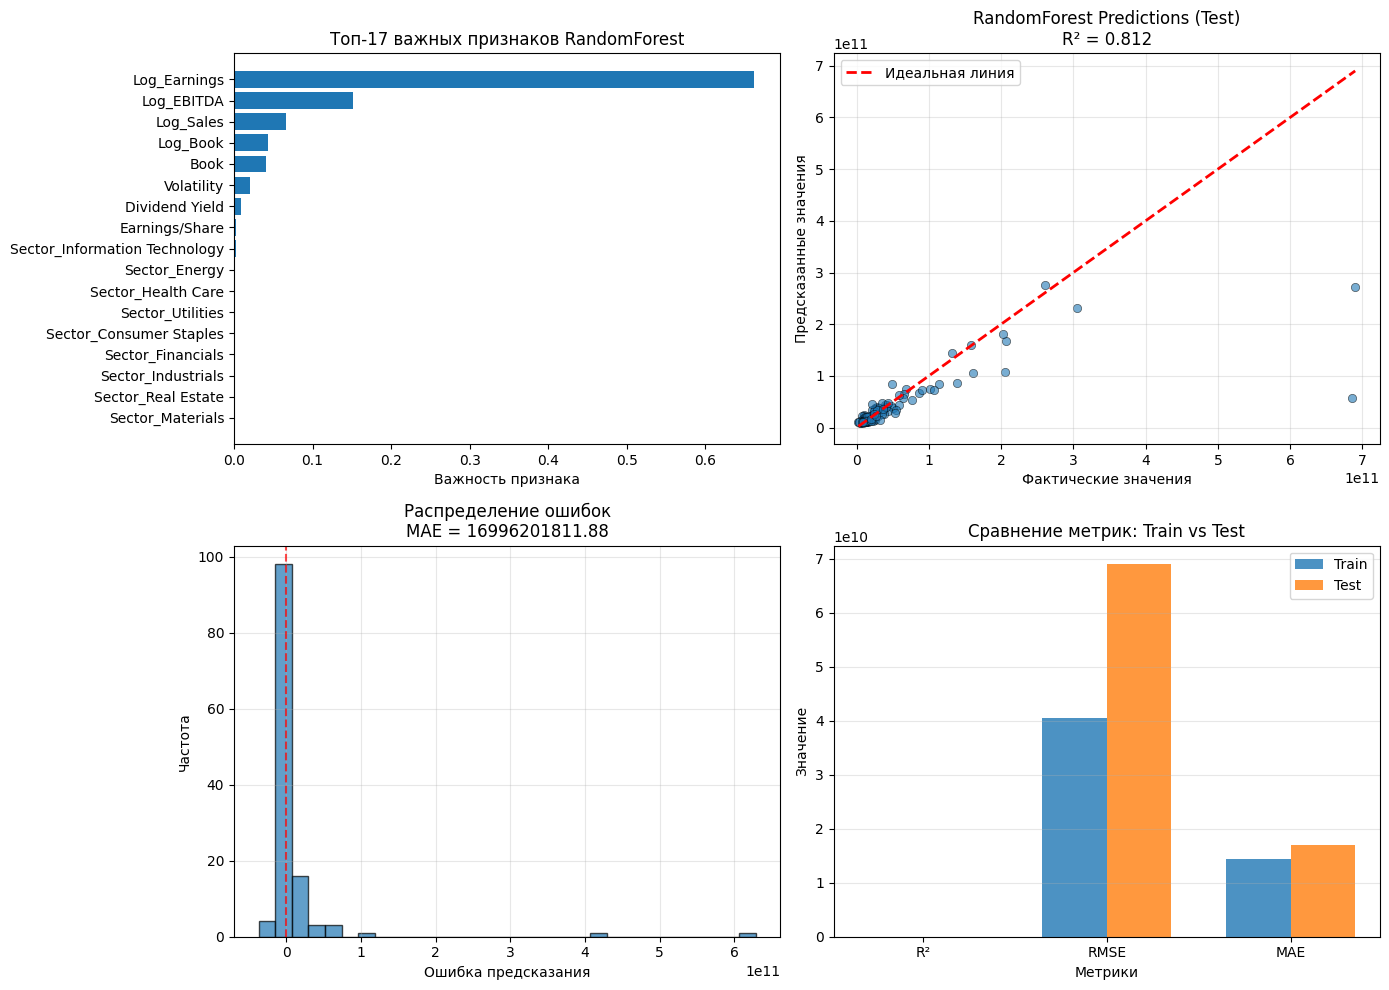

In [ ]:
# 9. Важность признаков
rf_model = best_model.named_steps['rf']
feature_importances = rf_model.feature_importances_

try:
    feature_names = X_train.columns
except:
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# 10. Анализ структуры леса
print(f"\n АНАЛИЗ СТРУКТУРЫ RANDOM FOREST:")
print(f"   Количество деревьев: {rf_model.n_estimators}")
print(f"   Глубина деревьев (средняя): {np.mean([tree.tree_.max_depth for tree in rf_model.estimators_]):.1f}")
print(f"   Глубина деревьев (максимальная): {np.max([tree.tree_.max_depth for tree in rf_model.estimators_]):.1f}")
print(f"   Количество листьев (среднее): {np.mean([tree.tree_.n_leaves for tree in rf_model.estimators_]):.1f}")

#  Визуализация

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Важность признаков
top_n = min(20, len(importance_df))
axes[0, 0].barh(range(top_n), importance_df['importance'].head(top_n)[::-1])
axes[0, 0].set_yticks(range(top_n))
axes[0, 0].set_yticklabels(importance_df['feature'].head(top_n)[::-1])
axes[0, 0].set_xlabel('Важность признака')
axes[0, 0].set_title(f'Топ-{top_n} важных признаков RandomForest')

# 2. Фактические vs Предсказанные (Test)
axes[0, 1].scatter(y_test_original_scale_rf, y_pred_original_scale_rf, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 1].plot([y_test_original_scale_rf.min(), y_test_original_scale_rf.max()], 
                [y_test_original_scale_rf.min(), y_test_original_scale_rf.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[0, 1].set_xlabel('Фактические значения')
axes[0, 1].set_ylabel('Предсказанные значения')
axes[0, 1].set_title(f'RandomForest Predictions (Test)\nR² = {test_r2_rf:.3f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Ошибки предсказания
errors = y_test_original_scale_rf - y_pred_original_scale_rf
axes[1, 0].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 0].set_xlabel('Ошибка предсказания')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title(f'Распределение ошибок\nMAE = {mean_absolute_error(y_test_original_scale_rf, y_pred_original_scale_rf):.2f}')
axes[1, 0].grid(True, alpha=0.3)

# 4. Сравнение метрик
metrics_comparison = ['R²', 'RMSE', 'MAE']
train_vals = [
    r2_score(y_train_original_scale_rf, y_pred_train_original_scale_rf),
    np.sqrt(mean_squared_error(y_train_original_scale_rf, y_pred_train_original_scale_rf)),
    mean_absolute_error(y_train_original_scale_rf, y_pred_train_original_scale_rf)
]
test_vals = [
    r2_score(y_test_original_scale_rf, y_pred_original_scale_rf),
    np.sqrt(mean_squared_error(y_test_original_scale_rf, y_pred_original_scale_rf)),
    mean_absolute_error(y_test_original_scale_rf, y_pred_original_scale_rf)
]

x = np.arange(len(metrics_comparison))
width = 0.35
axes[1, 1].bar(x - width/2, train_vals, width, label='Train', alpha=0.8)
axes[1, 1].bar(x + width/2, test_vals, width, label='Test', alpha=0.8)
axes[1, 1].set_xlabel('Метрики')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].set_title('Сравнение метрик: Train vs Test')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_comparison)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Вывод по Random Forest

Абсолютная ошибка высока (68.94 млрд $), но это связано с большим разбросом капитализаций в данных (от миллионов до сотен миллиардов).

Относительная ошибка 34.87% более информативна и показывает, что в среднем модель ошибается на треть от фактического значения.

Сравнение с бейзлайном
Улучшися коэффициент детерминации, уменшилась ошибка почти в 1.5 раза
Результат на тесте близок к результату на кросс-валидации (0.81 vs 0.77)

# ЭТАП 4: Метод опорных векторов SVM

In [25]:
# Изначально делали перебор всех комбинаций  scalers = [ StandardScaler,RobustScaler,  MinMaxScaler]
# kernels = ['linear', 'rbf', 'poly']
# В защиту идет только лучшая модель с RobustScaler и RBF ябром
dataset_name = "Log target and Financial Features"
scalers = { 'RobustScaler': RobustScaler() }
kernels = [ 'rbf']

param_grids = {
    'rbf': {
        'svr__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
    }
}

# Хранение всех результатов
all_results = []

# CV: не больше чем данных
n_splits = min(10, len(X_train))
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for scaler_name, scaler in scalers.items():
    for kernel in kernels:
        pipe = Pipeline([
            ('scaler', scaler),
            ('svr', SVR(kernel=kernel, epsilon=0.1))
        ])

        grid = GridSearchCV(
            pipe,
            param_grids[kernel],
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            return_train_score=True  # Важно!
        )

        try:
            start = time.time()
            grid.fit(X_train, y_train)
            fit_time = time.time() - start

            # Получаем лучшую модель
            best_model = grid.best_estimator_
            
            # 1. R² на тренировочных данных (с использованием best_model)
            y_train_pred = best_model.predict(X_train)
            r2_train = r2_score(y_train, y_train_pred)
            
            # 2. Детальная кросс-валидация
            cv_scores = cross_val_score(
                best_model, 
                X_train, 
                y_train,
                cv=cv,
                scoring='r2',
                n_jobs=-1
            )
            
            # Предсказание на тесте
            y_pred = best_model.predict(X_test)

            # Обратное преобразование
            y_test_orig = inverse_signed_log(y_test)
            y_pred_orig = inverse_signed_log(y_pred)
            y_train_orig = inverse_signed_log(y_train)
            y_train_pred_orig = inverse_signed_log(y_train_pred)

            # Метрики в исходных единицах
            r2_test = r2_score(y_test, y_pred)
            rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
            mae_test = mean_absolute_error(y_test_orig, y_pred_orig)
            mape_test = mean_absolute_percentage_error(y_test_orig, y_pred_orig)

            # R² на train в исходных единицах
            r2_train = r2_score(y_train, y_train_pred)            
            
            # Статистика кросс-валидации
            r2_cv_mean = cv_scores.mean()
            r2_cv_std = cv_scores.std()
            r2_cv_min = cv_scores.min()
            r2_cv_max = cv_scores.max()

            all_results.append({
                'Dataset': dataset_name,
                'Scaler': scaler_name,
                'Kernel': kernel,
                'Best_Params': str(grid.best_params_),

                'R2_train': round(r2_train, 4),          # R² на train
                'R2_CV_mean': round(r2_cv_mean, 4),          # Среднее по CV
                'R2_CV_std': round(r2_cv_std, 4),            # Стандартное отклонение
                'R2_CV_min': round(r2_cv_min, 4),            # Минимум по фолдам
                'R2_CV_max': round(r2_cv_max, 4),            # Максимум по фолдам
                'CV_scores': list(np.round(cv_scores, 4)),   # Все 10 фолдов
                
                'R2_test': round(r2_test, 4),
                'RMSE_test': round(rmse_test, 2),
                'MAE_test': round(mae_test*100, 2),
                'MAPE_test': round(mape_test, 2),
                'Fit_time_sec': round(fit_time, 4)
            })

        except Exception as e:
            print(f"Ошибка в {dataset_name} | {scaler_name} | {kernel}: {e}")
            continue


In [26]:
for i, result in enumerate(all_results):
    print(f"\nЛучшая Модель:")
    print(f"  Scaler: {result['Scaler']}, Ядро: {result['Kernel']}")
    print(f"  RMSE: {result['RMSE_test']}")
    print(f"  MAE: {result['MAE_test']}")
    print(f"  MAPE: {result['MAPE_test']}")
    
    print(f"  R² train: {result['R2_train']}")
    print(f"  R² test: {result['R2_test']}")
    print(f"  MIN R² на кросс-валидации: {result['R2_CV_min']}")
    print(f"  MAX R² на кросс-валидации: {result['R2_CV_max']}")
    print(f"  Отколнение R² на кросс-валидации: {result['R2_CV_std']}")
    print(f"  Среднее R² на кросс-валидации: {result['R2_CV_mean']}")
    print(f"  Время обучения: {result['Fit_time_sec']}")



Лучшая Модель:
  Scaler: RobustScaler, Ядро: rbf
  RMSE: 65285752691.38
  MAE: 1699950739814.73
  MAPE: 0.35
  R² train: 0.9204
  R² test: 0.7893
  MIN R² на кросс-валидации: 0.7073
  MAX R² на кросс-валидации: 0.9051
  Отколнение R² на кросс-валидации: 0.0571
  Среднее R² на кросс-валидации: 0.8366
  Время обучения: 104.7834


# ИТОГИ ПО Методу опорных векторов

Модель SVM с RBF ядром показывает ХОРОШий коэффициент детерминации после корректного логарифмического преобразования данных.

R² test: 0.7893 → Модель объясняет 79% дисперсии рыночной капитализации

Train R²: 0.9204   →   Test R²: 0.7893
Разница: 0.1311 (Есть небольшое переобучение, но это лучший результат по SVM)

Финансовые метрики

- RMSE: 65.29 млрд $ 
- MAE: 17.00 млрд $
- MAPE: 35%

MAPE 35% → в среднем ошибка составляет треть от фактического значения
RMSE > MAE → наличие крупных ошибок на отдельных компаниях
Логарифмическая шкала уменьшила влияние выбросов, но не устранила проблему полностью



Где модель МОЖЕТ использоваться:
- ✅ Ранжирование компаний по потенциалу капитализации
- ✅ Скрининг инвестиционных возможностей
- ✅ Бенчмаркинг против рыночных ожиданий
- ✅ Выявление аномалий в оценке компаний

Где результаты будут плохие:
- ⚠️ Точное прогнозирование для торговых стратегий
- ⚠️ Оценка IPO и новых компаний
- ⚠️ Кризисные периоды с нестандартным поведением рынка

⏱️ Анализ времени обучения
- Время обучения: 112.76 секунд

Достаточно хорошое время, SVM с полиномами и подбором гиперпараметров занял больше часа

# ЭТАП 5: Градиентный бустинг CatBoost

In [68]:
# Для catBoost сделаем отдельную разбивку 
# Определяем целевую переменную и признаки
y_cat = df_cat['Log_Market Cap']

# все остальные столбцы, кроме целевой
X_cat = df_cat.drop('Log_Market Cap', axis=1)

# Разбиваем датасет на обучающую и тестовую выборки
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split( X_cat, 
                                                                     y_cat,
                                                                     random_state=42,
                                                                     shuffle=True )

categorical_features = X_cat.select_dtypes(include=['object']).columns
numerical_features = X_cat.select_dtypes(exclude=['object']).columns
cat_features = ['Sector']
categorical_features

Index(['Sector'], dtype='object')

In [69]:
# Масштабирование числовых признаков с RobustScaler
# Создаем и применяем RobustScaler
scaler = RobustScaler()

# Применяем scaler только к числовым признакам
X_train_num_scaled = scaler.fit_transform(X_train_cat[numerical_features])
X_test_num_scaled = scaler.transform(X_test_cat[numerical_features])

# Собираем обратно с категориальными признаками
X_train_scaled = pd.DataFrame(
    X_train_num_scaled, 
    columns=numerical_features, 
    index=X_train_cat.index
)
X_train_scaled[cat_features] = X_train_cat[cat_features].values

X_test_scaled = pd.DataFrame(
    X_test_num_scaled, 
    columns=numerical_features, 
    index=X_test_cat.index
)
X_test_scaled[cat_features] = X_test_cat[cat_features].values

# Создаем Pool для CatBoost
train_pool = Pool(X_train_scaled, y_train_cat, cat_features=cat_features)
test_pool = Pool(X_test_scaled, y_test_cat, cat_features=cat_features)

In [70]:
def objective(trial):
    #Optuna с кросс-валидацией на 10 фолдах    
    # Определяем гиперпараметры для подбора
    params = {
        'iterations': trial.suggest_int('iterations', 300, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 0.1, 3.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_categorical('border_count', [32, 64, 128, 256]),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'use_best_model': True,
        'verbose': False,
        'random_seed': 42,
        'task_type': 'CPU',
        'early_stopping_rounds': 50,
        'loss_function': 'RMSE',
    }
    
    #  ДОБАВЛЕНИЕ max_leaves ТОЛЬКО ДЛЯ Lossguide ( иначе на ошибку нарвались)
    if params['grow_policy'] == 'Lossguide':
        params['max_leaves'] = trial.suggest_int('max_leaves', 16, 256)
    
    # Настраиваем кросс-валидацию на 10 фолдов
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_idx, val_idx in kfold.split(X_train_scaled, y_train_cat):
        # Разделение на тренировочную и валидационную выборки
        X_train_fold, X_val_fold = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_cat.iloc[train_idx], y_train_cat.iloc[val_idx]
        
        # Создаем Pool для текущего фолда
        train_pool_fold = Pool(X_train_fold, y_train_fold, cat_features=cat_features)
        val_pool_fold = Pool(X_val_fold, y_val_fold, cat_features=cat_features)
        
        # Инициализируем и обучаем модель
        model = CatBoostRegressor(**params)
        model.fit(
            train_pool_fold,
            eval_set=val_pool_fold,  # Важно для use_best_model=True
            verbose=False
        )
        
        # Предсказания и оценка
        y_pred_fold = model.predict(val_pool_fold)
        fold_score = mean_squared_error(y_val_fold, y_pred_fold)
        cv_scores.append(fold_score)
    
    # Возвращаем средний MSE по всем фолдам
    return np.mean(cv_scores)

In [71]:
study = optuna.create_study(
    direction='minimize',
    study_name='catboost_optimization',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=30)
)

# Запускаем оптимизацию n_trials=100 обучался бы 7 часов, 10 попыток - за 45 минут
study.optimize(objective, n_trials=10, show_progress_bar=True)
print("РЕЗУЛЬТАТЫ OPTUNA:")
print(f"Лучшие параметры: {study.best_params}")
print(f"Лучший MSE (кросс-валидация): {study.best_value:.4f}")

[I 2025-12-23 18:38:51,811] A new study created in memory with name: catboost_optimization


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-12-23 18:39:53,851] Trial 0 finished with value: 0.16474478382822594 and parameters: {'iterations': 937, 'learning_rate': 0.22648248189516848, 'depth': 10, 'l2_leaf_reg': 0.24810409748678125, 'random_strength': 0.5524540572830658, 'bagging_temperature': 0.15599452033620265, 'border_count': 64, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 22}. Best is trial 0 with value: 0.16474478382822594.
[I 2025-12-23 18:42:40,286] Trial 1 finished with value: 0.24552587728813627 and parameters: {'iterations': 609, 'learning_rate': 0.002846526357761094, 'depth': 6, 'l2_leaf_reg': 0.12561043700013558, 'random_strength': 1.3526405540621358, 'bagging_temperature': 0.2912291401980419, 'border_count': 32, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 52}. Best is trial 0 with value: 0.16474478382822594.
[I 2025-12-23 18:52:33,472] Trial 2 finished with value: 0.23753561568310108 and parameters: {'iterations': 1307, 'learning_rate': 0.0013033567475147442, 'depth': 9, 'l2_leaf_reg': 0.00480946

In [72]:
print("Обучение ллучшей модели")
# Подготовка лучших параметров
best_params = study.best_params.copy()

# Удаляем max_leaves если grow_policy не Lossguide
if 'max_leaves' in best_params and best_params.get('grow_policy') != 'Lossguide':
    del best_params['max_leaves']

# Добавляем обязательные параметры
best_params.update({
    'use_best_model': True,
    'verbose': 100,
    'random_seed': 42,
    'task_type': 'CPU',
    'early_stopping_rounds': 50,
    'loss_function': 'RMSE',
})

# Создаем и обучаем лучшую модель
best_model = CatBoostRegressor(**best_params)
best_model.fit(
    train_pool,
    eval_set=test_pool,
    plot=True
)

Обучение ллучшей модели


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9705987	test: 1.0249135	best: 1.0249135 (0)	total: 69.2ms	remaining: 1m 55s
100:	learn: 0.3352421	test: 0.4380721	best: 0.4380721 (100)	total: 4.77s	remaining: 1m 14s
200:	learn: 0.2390704	test: 0.4035486	best: 0.4035486 (200)	total: 10.7s	remaining: 1m 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4018434444
bestIteration = 219

Shrink model to first 220 iterations.


In [73]:
# Подготавливаем параметры для CV
cv_params = best_params.copy()
cv_params['verbose'] = False  # Отключаем вывод при CV
cv_params['use_best_model'] = True

# Выполняем встроенную кросс-валидацию CatBoost
cv_data = cv(
    params=cv_params,
    pool=train_pool,
    fold_count=10,
    partition_random_seed=42,
    shuffle=True,
    stratified=False,
    as_pandas=True,
    verbose=False
)

# Анализируем результаты CV
best_iteration_cv = cv_data['test-RMSE-mean'].idxmin() + 1
best_rmse_cv = cv_data['test-RMSE-mean'].min()
best_rmse_std = cv_data.loc[cv_data['test-RMSE-mean'].idxmin(), 'test-RMSE-std']

print(f"Лучшая итерация по CV: {best_iteration_cv}")
print(f"Лучший RMSE: {best_rmse_cv:.4f} ± {best_rmse_std:.4f}")

# Для расчета R² по фолдам используем дополнительный подход
print("\n" + "="*60)
print("РАСЧЕТ R² ДЛЯ КАЖДОГО ФОЛДА КРОСС-ВАЛИДАЦИИ")
print("="*60)


Training on fold [0/10]



bestTest = 0.3752725393
bestIteration = 568

Training on fold [1/10]

bestTest = 0.372615542
bestIteration = 325

Training on fold [2/10]

bestTest = 0.5067842122
bestIteration = 337

Training on fold [3/10]

bestTest = 0.2815451345
bestIteration = 480

Training on fold [4/10]

bestTest = 0.4622027009
bestIteration = 226

Training on fold [5/10]

bestTest = 0.3631736766
bestIteration = 590

Training on fold [6/10]

bestTest = 0.3931358227
bestIteration = 372

Training on fold [7/10]

bestTest = 0.2923663472
bestIteration = 367

Training on fold [8/10]

bestTest = 0.3468484279
bestIteration = 714

Training on fold [9/10]

bestTest = 0.4874887341
bestIteration = 313

Лучшая итерация по CV: 715
Лучший RMSE: 0.3912 ± 0.0786

РАСЧЕТ R² ДЛЯ КАЖДОГО ФОЛДА КРОСС-ВАЛИДАЦИИ


In [74]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_r2_scores = []
cv_rmse_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train_scaled, y_train_cat), 1):
    # Разделение данных для текущего фолда
    X_train_fold, X_val_fold = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_cat.iloc[train_idx], y_train_cat.iloc[val_idx]
    
    # Создание Pool для фолда
    train_pool_fold = Pool(X_train_fold, y_train_fold, cat_features=cat_features)
    val_pool_fold = Pool(X_val_fold, y_val_fold, cat_features=cat_features)
    
    # Создание и обучение модели с best_params
    model_fold_params = best_params.copy()
    model_fold_params['verbose'] = False
    model_fold_params['iterations'] = best_iteration_cv  # Используем оптимальное количество итераций
    
    model_fold = CatBoostRegressor(**model_fold_params)
    model_fold.fit(train_pool_fold, eval_set=val_pool_fold, verbose=False)
    
    # Предсказания и расчет метрик
    y_pred_fold = model_fold.predict(val_pool_fold)
    fold_r2 = r2_score(y_val_fold, y_pred_fold)
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    
    cv_r2_scores.append(fold_r2)
    cv_rmse_scores.append(fold_rmse)
    
    print(f"Фолд {fold}: R² = {fold_r2:.4f}, RMSE = {fold_rmse:.4f}")

# Статистика по кросс-валидации
cv_r2_mean = np.mean(cv_r2_scores)
cv_r2_std = np.std(cv_r2_scores)
cv_r2_min = np.min(cv_r2_scores)
cv_r2_max = np.max(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)

print("\n" + "="*60)
print("СТАТИСТИКА КРОСС-ВАЛИДАЦИИ")
print("="*60)
print(f"Средний R²: {cv_r2_mean:.4f} ± {cv_r2_std:.4f}")
print(f"Диапазон R²: [{cv_r2_min:.4f}, {cv_r2_max:.4f}]")
print(f"Средний RMSE: {cv_rmse_mean:.4f}")


Фолд 1: R² = 0.9388, RMSE = 0.2694
Фолд 2: R² = 0.9250, RMSE = 0.2903
Фолд 3: R² = 0.8139, RMSE = 0.4294
Фолд 4: R² = 0.8382, RMSE = 0.4337
Фолд 5: R² = 0.7658, RMSE = 0.4325
Фолд 6: R² = 0.8075, RMSE = 0.3992
Фолд 7: R² = 0.8471, RMSE = 0.3554
Фолд 8: R² = 0.9077, RMSE = 0.3060
Фолд 9: R² = 0.7590, RMSE = 0.4176
Фолд 10: R² = 0.8209, RMSE = 0.4282

СТАТИСТИКА КРОСС-ВАЛИДАЦИИ
Средний R²: 0.8424 ± 0.0598
Диапазон R²: [0.7590, 0.9388]
Средний RMSE: 0.3762


In [80]:
# Предсказания на тренировочной и тестовой выборках
y_train_pred_log = best_model.predict(train_pool)
y_test_pred_log = best_model.predict(test_pool)

# R² на train и test (логарифмированная шкала)
r2_train_log = r2_score(y_train_cat, y_train_pred_log)
r2_test_log = r2_score(y_test_cat, y_test_pred_log)


In [81]:
print("\n" + "="*60)
print("СВОДКА ПО КОЭФФИЦИЕНТУ ДЕТЕРМИНАЦИИ R² (ЛОГАРИФМИРОВАННАЯ ШКАЛА)")
print("="*60)
print(f"{'Метрика':<30} {'Значение':<15} {'Комментарий':<30}")
print("-"*75)
print(f"{'R² на тренировочной выборке':<30} {r2_train_log:<15.4f} {'(Логарифмированная шкала)':<30}")
print(f"{'R² на тестовой выборке':<30} {r2_test_log:<15.4f} {'(Логарифмированная шкала)':<30}")
print(f"{'R² средний CV (10 фолдов)':<30} {cv_r2_mean:<15.4f} {'(Логарифмированная шкала)':<30}")
print(f"{'R² std CV':<30} {cv_r2_std:<15.4f} {'':<30}")
print(f"{'R² min CV':<30} {cv_r2_min:<15.4f} {'':<30}")
print(f"{'R² max CV':<30} {cv_r2_max:<15.4f} {'':<30}")
print("-"*75)



СВОДКА ПО КОЭФФИЦИЕНТУ ДЕТЕРМИНАЦИИ R² (ЛОГАРИФМИРОВАННАЯ ШКАЛА)
Метрика                        Значение        Комментарий                   
---------------------------------------------------------------------------
R² на тренировочной выборке    0.9493          (Логарифмированная шкала)     
R² на тестовой выборке         0.8513          (Логарифмированная шкала)     
R² средний CV (10 фолдов)      0.8424          (Логарифмированная шкала)     
R² std CV                      0.0598                                        
R² min CV                      0.7590                                        
R² max CV                      0.9388                                        
---------------------------------------------------------------------------


In [85]:
# Преобразование в оригинальную шкалу для финансовых метрик
print("\n" + "="*60)
print("ФИНАНСОВЫЕ МЕТРИКИ (В ОРИГИНАЛЬНОЙ ШКАЛЕ)")
print("="*60)

# Предполагаем, что inverse_signed_log определен выше
y_train_original = inverse_signed_log(y_train_cat)
y_test_original = inverse_signed_log(y_test_cat)
y_train_pred_original = inverse_signed_log(y_train_pred_log)
y_test_pred_original = inverse_signed_log(y_test_pred_log)

# Метрики для test (оригинальная шкала)
mse_test_original = mean_squared_error(y_test_original, y_test_pred_original)
rmse_test_original = np.sqrt(mse_test_original)
mae_test_original = mean_absolute_error(y_test_original, y_test_pred_original)
mape_test_original = mean_absolute_percentage_error(y_test_original, y_test_pred_original)

print(f"{'MSE (ориг) Test':<20} {mse_test_original:>15,.2f}")
print(f"{'RMSE (ориг) Test':<20} {rmse_test_original:>15,.2f}")
print(f"{'MAE (ориг) Test':<20} {mae_test_original:>15,.2f}")
print(f"{'MAPE % (ориг) Test':<20} {mape_test_original*100:>15,.2f}")


ФИНАНСОВЫЕ МЕТРИКИ (В ОРИГИНАЛЬНОЙ ШКАЛЕ)
MSE (ориг) Test      3,678,953,291,400,653,832,192.00
RMSE (ориг) Test     60,654,375,698.71
MAE (ориг) Test      15,511,608,557.56
MAPE % (ориг) Test             31.38


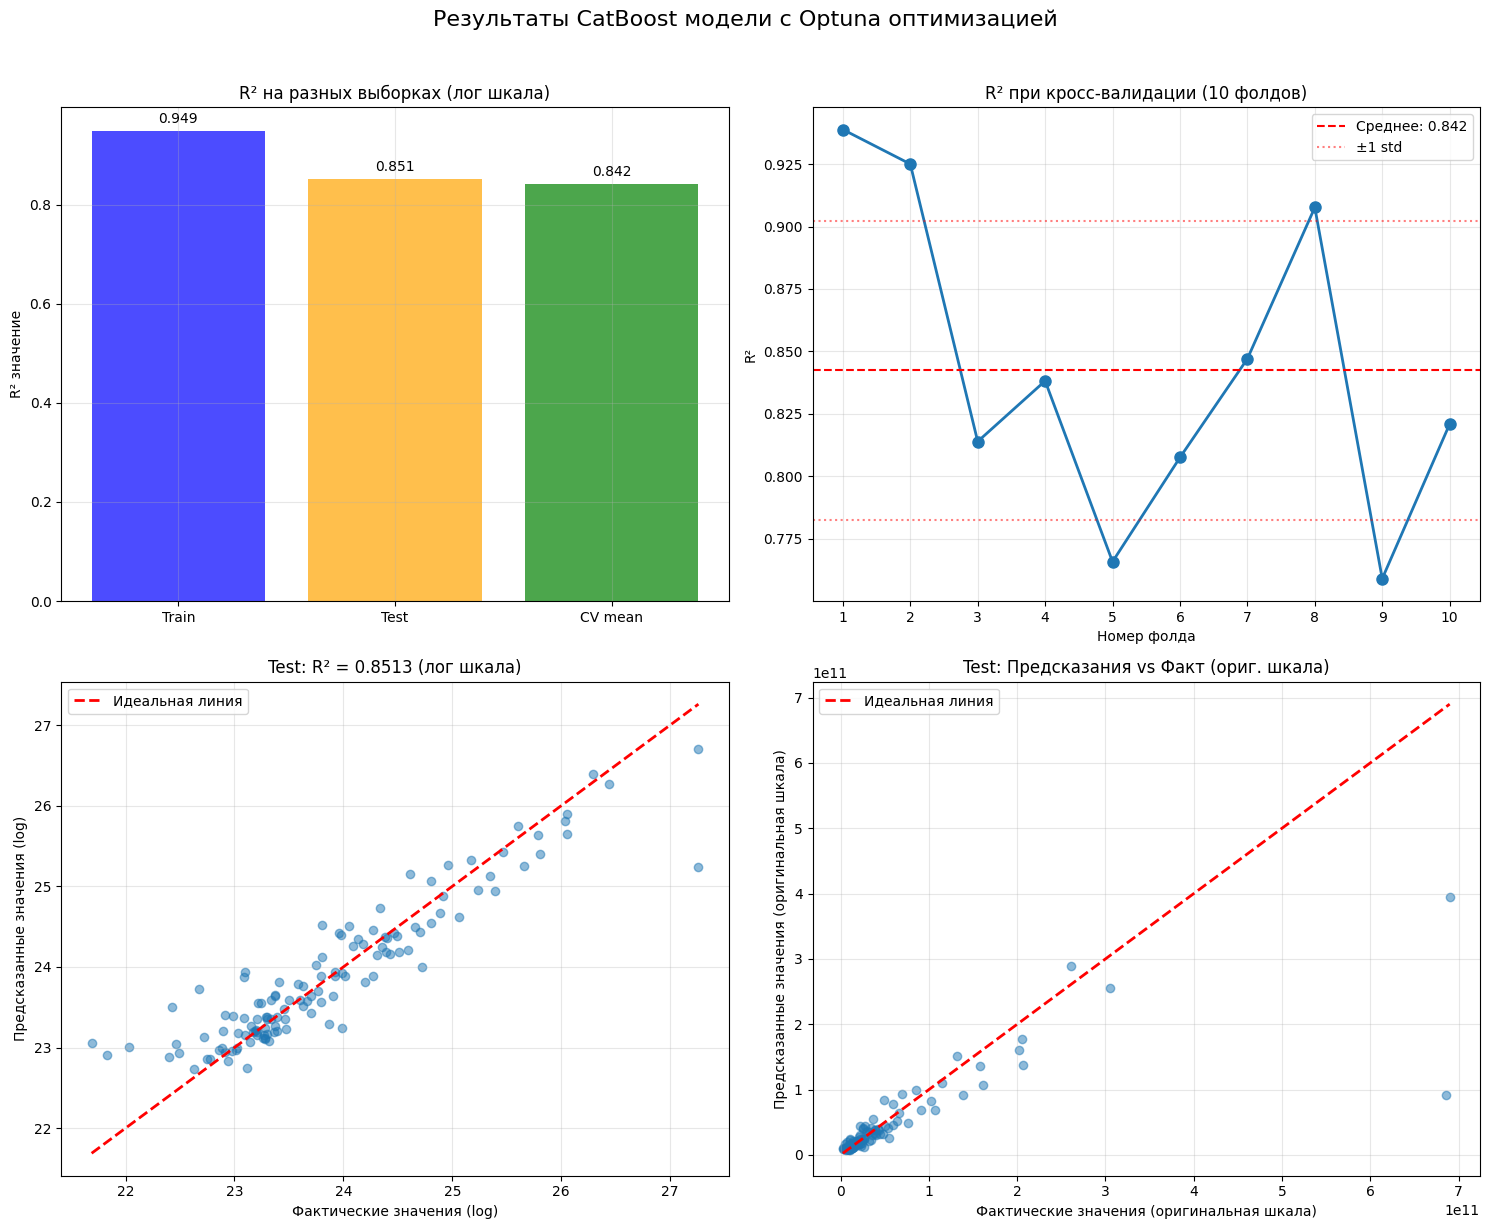

In [86]:
# Создаем фигуру с 4 графиками
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: R² на разных выборках
axes[0, 0].bar(['Train', 'Test', 'CV mean'], 
               [r2_train_log, r2_test_log, cv_r2_mean],
               color=['blue', 'orange', 'green'], alpha=0.7)
axes[0, 0].set_ylabel('R² значение')
axes[0, 0].set_title('R² на разных выборках (лог шкала)')
axes[0, 0].grid(True, alpha=0.3)
# Добавляем значения на столбцы
for i, v in enumerate([r2_train_log, r2_test_log, cv_r2_mean]):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# График 2: Разброс R² при кросс-валидации
axes[0, 1].plot(range(1, 11), cv_r2_scores, 'o-', linewidth=2, markersize=8)
axes[0, 1].axhline(y=cv_r2_mean, color='r', linestyle='--', label=f'Среднее: {cv_r2_mean:.3f}')
axes[0, 1].axhline(y=cv_r2_mean + cv_r2_std, color='r', linestyle=':', alpha=0.5, label=f'±1 std')
axes[0, 1].axhline(y=cv_r2_mean - cv_r2_std, color='r', linestyle=':', alpha=0.5)
axes[0, 1].set_xlabel('Номер фолда')
axes[0, 1].set_ylabel('R²')
axes[0, 1].set_title('R² при кросс-валидации (10 фолдов)')
axes[0, 1].set_xticks(range(1, 11))
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: Сравнение предсказаний и фактических значений (test, лог шкала)
axes[1, 0].scatter(y_test_cat, y_test_pred_log, alpha=0.5)
axes[1, 0].plot([y_test_cat.min(), y_test_cat.max()], 
                [y_test_cat.min(), y_test_cat.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[1, 0].set_xlabel('Фактические значения (log)')
axes[1, 0].set_ylabel('Предсказанные значения (log)')
axes[1, 0].set_title(f'Test: R² = {r2_test_log:.4f} (лог шкала)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# График 4: Сравнение предсказаний и фактических значений (test, оригинальная шкала)
axes[1, 1].scatter(y_test_original, y_test_pred_original, alpha=0.5)
axes[1, 1].plot([y_test_original.min(), y_test_original.max()], 
                [y_test_original.min(), y_test_original.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[1, 1].set_xlabel('Фактические значения (оригинальная шкала)')
axes[1, 1].set_ylabel('Предсказанные значения (оригинальная шкала)')
axes[1, 1].set_title('Test: Предсказания vs Факт (ориг. шкала)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Результаты CatBoost модели с Optuna оптимизацией', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



ТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:
       feature  importance  importance_percent
  Log_Earnings   69.452164           69.452164
    Log_EBITDA   12.018277           12.018277
    Volatility    4.393007            4.393007
      Log_Book    3.971779            3.971779
          Book    3.546048            3.546048
Dividend Yield    2.316224            2.316224
Earnings/Share    1.919488            1.919488
     Log_Sales    1.363033            1.363033
        Sector    1.019979            1.019979


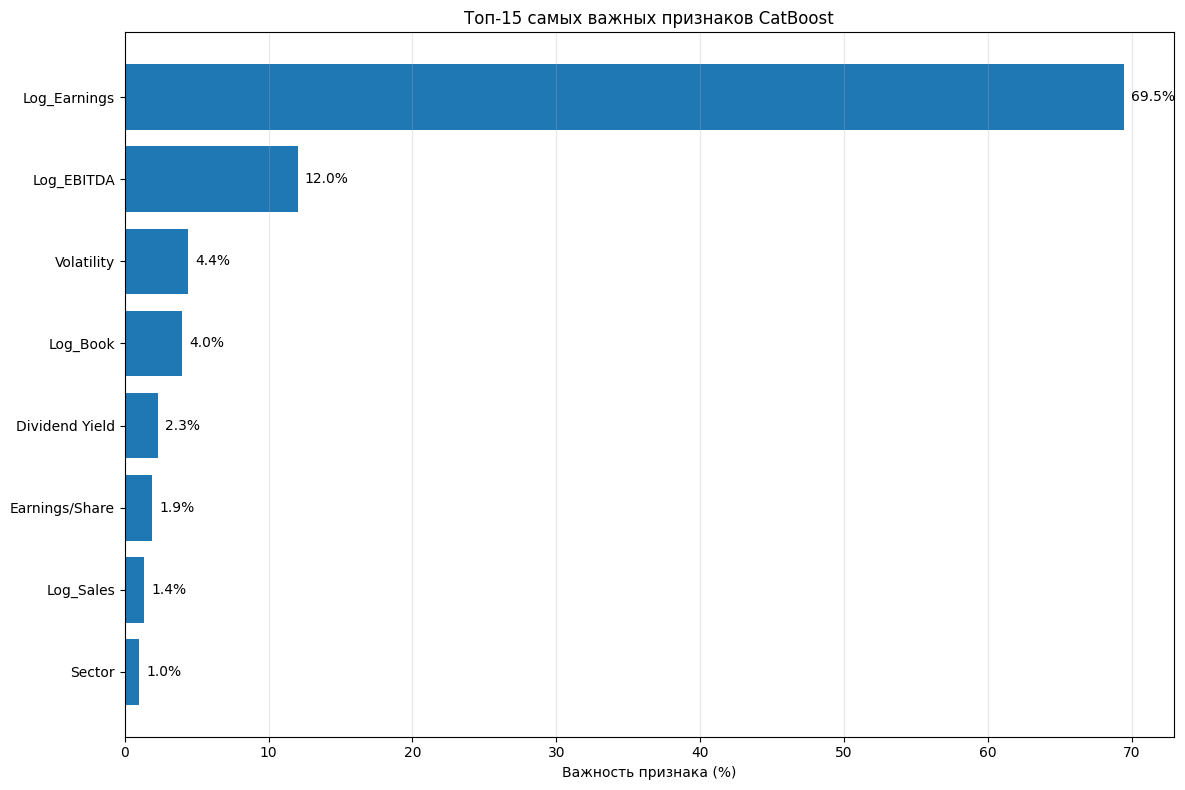

In [ ]:
#ВАЖНОСТЬ ПРИЗНАКОВ
feature_importance = best_model.get_feature_importance()
feature_names = X_train_scaled.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance,
    'importance_percent': (feature_importance / feature_importance.sum()) * 100
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("ТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ:")
print("="*60)
print(importance_df.head(15).to_string(index=False))

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance_percent'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Важность признака (%)')
plt.title('Топ-15 самых важных признаков CatBoost')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
# Добавляем значения процентов
for i, v in enumerate(top_features['importance_percent'].values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.show()


In [ ]:
top_features.drop('Book',axis)

feature  importance  importance_percent
5    Log_Earnings   69.452164           69.452164
4      Log_EBITDA   12.018277           12.018277
3      Volatility    4.393007            4.393007
7        Log_Book    3.971779            3.971779
2            Book    3.546048            3.546048
0  Dividend Yield    2.316224            2.316224
1  Earnings/Share    1.919488            1.919488
6       Log_Sales    1.363033            1.363033
8          Sector    1.019979            1.019979

# Выводы по CatBoot


## Анализ R² коэффициента

- **R² train:**	            0.9493	Отличное объяснение тренировочных данных (94.93% дисперсии)
- **R² test:**	            0.8513	Хорошее качество на новых данных (85.13% дисперсии)
- **Разница train-test**	0.0980	
- **R² CV mean**	        0.8424	Стабильное качество при кросс-валидации
- **R² CV std**	            0.0598	Умеренная изменчивость между фолдами

## Анализ финансовых метрик
- **MSE**	60.65 млрд $	Средняя ошибка предсказания капитализации
- **MAE**	15.51 млрд $	Средняя абсолютная ошибка
- **MAPE**	31.38%	Критически высокий процент ошибки

Как и во всех предыдущих моделях финансовые метрики плохие и не позволяют ее
использовать в практических целях. 

MAPE = 31.38% - модель ошибается в среднем на 31% от фактической капитализации. Для инвестиционных решений это неприемлемо высокий уровень ошибки.

Большой разрыв между RMSE и MAE:
RMSE (60.65 млрд) значительно выше MAE (15.51 млрд)
Это указывает на наличие выбросов (крупных компаний), которые сильно влияют на RMSE

Абсолютные величины ошибок:
Средняя ошибка 15.5 млрд $ - существенная сумма даже для крупных компаний
Максимальные ошибки достигают десятков миллиардов

Очень хороший коэффициент детерминации, но данных слишком мало
Рекомендация одна - увеличивать датасет, наполнять данными и новыми признаками

# ЭТАП 6: Stacking Regressor

In [165]:
numerical_features = list(X.columns)

In [166]:
def create_preprocessor():
#Создание пайплайна предобработки
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

Оптимизация гиперпараметров с Optuna

In [167]:
def optimize_hyperparameters(X_train, y_train, n_trials=30):
    print("Оптимизируем гиперпараметры OPTUNA")
    
    # Создаем копии данных
    X_train_copy = X_train.copy()
    y_train_copy = y_train.copy()
    
    preprocessor = create_preprocessor()
    
    best_models = {}
    best_params = {}
    best_scores = {}
    
    # 1. Ridge Regression
    def ridge_objective(trial):
        alpha = trial.suggest_float('alpha', 1e-4, 100, log=True)
        model = Ridge(alpha=alpha, random_state=42)
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        return cross_val_score(pipeline, X_train_copy, y_train_copy, cv=10, scoring='r2', n_jobs=-1).mean()
    
    ridge_study = optuna.create_study(direction='maximize')
    ridge_study.optimize(ridge_objective, n_trials=10, show_progress_bar=False)
    best_models['ridge'] = Ridge(**ridge_study.best_params, random_state=42)
    best_params['ridge'] = ridge_study.best_params
    best_scores['ridge'] = ridge_study.best_value
    print(f"✓ Ridge оптимизирован, R²: {ridge_study.best_value:.4f}")
    
    # 2. Random Forest
    def rf_objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        }
        model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        return cross_val_score(pipeline, X_train_copy, y_train_copy, cv=10, scoring='r2', n_jobs=-1).mean()
    
    rf_study = optuna.create_study(direction='maximize')
    rf_study.optimize(rf_objective, n_trials=15, show_progress_bar=False)
    best_models['rf'] = RandomForestRegressor(**rf_study.best_params, random_state=42, n_jobs=-1)
    best_params['rf'] = rf_study.best_params
    best_scores['rf'] = rf_study.best_value
    print(f"RandomForest оптимизирован, R²: {rf_study.best_value:.4f}")
    
    # 3. XGBoost
    def xgb_objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        }
        model = XGBRegressor(**params, random_state=42, n_jobs=-1, verbosity=0)
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        return cross_val_score(pipeline, X_train_copy, y_train_copy, cv=10, scoring='r2', n_jobs=-1).mean()
    
    xgb_study = optuna.create_study(direction='maximize')
    xgb_study.optimize(xgb_objective, n_trials=15, show_progress_bar=False)
    best_models['xgb'] = XGBRegressor(**xgb_study.best_params, random_state=42, n_jobs=-1, verbosity=0)
    best_params['xgb'] = xgb_study.best_params
    best_scores['xgb'] = xgb_study.best_value
    print(f"XGBoost оптимизирован, R²: {xgb_study.best_value:.4f}")
    
    # 4. LightGBM
    def lgbm_objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 15, 100),
        }
        model = LGBMRegressor(**params, random_state=42, n_jobs=-1, verbose=-1)
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        return cross_val_score(pipeline, X_train_copy, y_train_copy, cv=10, scoring='r2', n_jobs=-1).mean()
    
    lgbm_study = optuna.create_study(direction='maximize')
    lgbm_study.optimize(lgbm_objective, n_trials=15, show_progress_bar=False)
    best_models['lgbm'] = LGBMRegressor(**lgbm_study.best_params, random_state=42, n_jobs=-1, verbose=-1)
    best_params['lgbm'] = lgbm_study.best_params
    best_scores['lgbm'] = lgbm_study.best_value
    print(f"LightGBM оптимизирован, R²: {lgbm_study.best_value:.4f}")
    
    # 5. SVR
    def svr_objective(trial):
        params = {
            'C': trial.suggest_float('C', 0.1, 10, log=True),
            'epsilon': trial.suggest_float('epsilon', 0.01, 0.5),
        }
        model = SVR(**params)
        pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
        return cross_val_score(pipeline, X_train_copy, y_train_copy, cv=10, scoring='r2', n_jobs=-1).mean()
    
    svr_study = optuna.create_study(direction='maximize')
    svr_study.optimize(svr_objective, n_trials=10, show_progress_bar=False)
    best_models['svr'] = SVR(**svr_study.best_params)
    best_params['svr'] = svr_study.best_params
    best_scores['svr'] = svr_study.best_value
    print(f"SVR оптимизирован, R²: {svr_study.best_value:.4f}")
    
    print(f"\nВсе модели оптимизированы!")
    return best_models, best_params, best_scores

In [168]:
def calculate_financial_metrics(y_true_log, y_pred_log):
    #Расчет финансовых метрик в оригинальной шкале (доллары)
    # Обратное преобразование в оригинальную шкалу
    y_true_orig = inverse_signed_log(y_true_log)
    y_pred_orig = inverse_signed_log(y_pred_log)
    
    # Расчет метрик в оригинальной шкале
    rmse_orig = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
    mae_orig = mean_absolute_error(y_true_orig, y_pred_orig)
    
    # MAPE в оригинальной шкале (с защитой от деления на ноль)
    y_true_abs = np.abs(y_true_orig)
    mape_orig = np.mean(np.abs((y_true_orig - y_pred_orig) / np.maximum(y_true_abs, 1e-6))) * 100
    
    return {
        'RMSE_original': rmse_orig,
        'MAE_original': mae_orig,
        'MAPE_original': mape_orig,
        'y_true_original': y_true_orig,
        'y_pred_original': y_pred_orig
    }


In [170]:
def format_currency(value):
    if value >= 1e9:
        return f"{value/1e9:.2f} млрд $"
    elif value >= 1e6:
        return f"{value/1e6:.2f} млн $"
    elif value >= 1e3:
        return f"{value/1e3:.2f} тыс $"
    else:
        return f"{value:.2f} $"    

In [171]:
def train_individual_models(X_train, y_train, X_test, y_test):
    print("Сравниваем базовые модели")
    
    models = {
        'Ridge': Ridge(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'XGBoost': XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
        'LightGBM': LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),
        'SVR': SVR()
    }
    
    results = {}
    preprocessor = create_preprocessor()
    
    for name, model in models.items():
        print(f"\nОбучение {name}")
        start_time = time.time()
        
        # Создание пайплайна
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        pipeline.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        # Предсказания
        y_train_pred = pipeline.predict(X_train)
        y_test_pred = pipeline.predict(X_test)
        
        # Расчет метрик
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Кросс-валидация
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
        r2_cv_mean = cv_scores.mean()
        r2_cv_std = cv_scores.std()
        
        # Финансовые метрики
        fin_metrics = calculate_financial_metrics(y_test, y_test_pred)
        
        # Сохранение результатов
        results[name] = {
            'R2_train': r2_train,
            'R2_test': r2_test,
            'R2_CV_mean': r2_cv_mean,
            'R2_CV_std': r2_cv_std,
            'RMSE_original': fin_metrics['RMSE_original'],
            'MAE_original': fin_metrics['MAE_original'],
            'MAPE_original': fin_metrics['MAPE_original'],
            'Train_time': train_time,
            'model': pipeline
        }
        
        print(f"  R² train: {r2_train:.4f}, R² test: {r2_test:.4f}")        
        print(f"  R² CV: {r2_cv_mean:.4f} ± {r2_cv_std:.4f}")
        print(f"  RMSE: {format_currency(fin_metrics['RMSE_original'])}")
        print(f"  MAE: {format_currency(fin_metrics['MAE_original'])}")
        print(f"  MAPE: {fin_metrics['MAPE_original']}")
        print(f"  Время обучения: {train_time:.2f} сек")
    
    return results

In [172]:
def train_and_evaluate(X, y):
    print("Обучение и оценка стекинг-модели")

    # Создаем копии данных
    X_copy = X.copy()
    y_copy = y.copy()
    
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)
    print(f"Размеры: обучающая выборка={len(X_train)}, тестовая={len(X_test)}")
    
    # 1. Сравнение базовых моделей
    base_results = train_individual_models(X_train, y_train, X_test, y_test)
    
    # 2. Оптимизация гиперпараметров для стекинга
    best_models, best_params, best_scores = optimize_hyperparameters(X_train, y_train, n_trials=30)
    
    # 3. Создание стекинг-модели
    stacking_estimators = [(name, model) for name, model in best_models.items()]
    
    print("\nОбучение финальной стекинг-модели")
    start_time = time.time()
    
    stacking = StackingRegressor(
        estimators=stacking_estimators,
        final_estimator=LinearRegression(),
        cv=10,
        n_jobs=-1
    )
    
    # Пайплайн для стекинга
    stacking_pipeline = Pipeline([
        ('preprocessor', create_preprocessor()),
        ('regressor', stacking)
    ])
    
    # Обучение стекинга
    stacking_pipeline.fit(X_train, y_train)
    stacking_train_time = time.time() - start_time
    
    # Предсказания стекинга
    y_train_pred_stacking = stacking_pipeline.predict(X_train)
    y_test_pred_stacking = stacking_pipeline.predict(X_test)
    
    # Метрики стекинга
    r2_train_stacking = r2_score(y_train, y_train_pred_stacking)
    r2_test_stacking = r2_score(y_test, y_test_pred_stacking)
    
    # Кросс-валидация стекинга
    cv_scores_stacking = cross_val_score(
        stacking_pipeline, X_train, y_train, 
        cv=10, scoring='r2', n_jobs=-1
    )
    
    r2_cv_mean_stacking = cv_scores_stacking.mean()
    r2_cv_std_stacking = cv_scores_stacking.std()
    
    # Финансовые метрики стекинга
    fin_metrics_stacking = calculate_financial_metrics(y_test, y_test_pred_stacking)
    
    # Результаты стекинга
    stacking_results = {
        'R2_train': r2_train_stacking,
        'R2_test': r2_test_stacking,
        'R2_CV_mean': r2_cv_mean_stacking,
        'R2_CV_std': r2_cv_std_stacking,
        'RMSE_original': fin_metrics_stacking['RMSE_original'],
        'MAE_original': fin_metrics_stacking['MAE_original'],
        'MAPE_original': fin_metrics_stacking['MAPE_original'],
        'Train_time': stacking_train_time,
        'model': stacking_pipeline,
        'y_true_original': fin_metrics_stacking['y_true_original'],
        'y_pred_original': fin_metrics_stacking['y_pred_original'],
        'y_train_pred': y_train_pred_stacking,
        'y_test_pred': y_test_pred_stacking
    }
    
    # Добавляем стекинг в результаты
    base_results['Stacking'] = stacking_results
    
    return base_results, best_params, best_scores, X_train, X_test, y_train, y_test

In [173]:
def plot_comparison_results(results):
    # 1. Сравнение R² на train и test
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    models = list(results.keys())
    
    # R² train vs test
    r2_train = [results[model]['R2_train'] for model in models]
    r2_test = [results[model]['R2_test'] for model in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, r2_train, width, label='R² Train', alpha=0.8, color='skyblue')
    axes[0, 0].bar(x + width/2, r2_test, width, label='R² Test', alpha=0.8, color='salmon')
    axes[0, 0].set_xlabel('Модель')
    axes[0, 0].set_ylabel('R²')
    axes[0, 0].set_title('Сравнение R² на Train и Test')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, (train, test) in enumerate(zip(r2_train, r2_test)):
        axes[0, 0].text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', fontsize=8)
        axes[0, 0].text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', fontsize=8)
    
    # 2. R² Cross-validation
    r2_cv_mean = [results[model]['R2_CV_mean'] for model in models]
    r2_cv_std = [results[model]['R2_CV_std'] for model in models]
    
    axes[0, 1].bar(x, r2_cv_mean, yerr=r2_cv_std, capsize=5, alpha=0.8, color='lightgreen')
    axes[0, 1].set_xlabel('Модель')
    axes[0, 1].set_ylabel('R² CV (среднее ± std)')
    axes[0, 1].set_title('Кросс-валидация R²')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Добавляем значения
    for i, (mean, std) in enumerate(zip(r2_cv_mean, r2_cv_std)):
        axes[0, 1].text(i, mean + 0.01, f'{mean:.3f}', ha='center', fontsize=8)
    
    # 3. Финансовые метрики (RMSE и MAE)
    rmse_values = [results[model]['RMSE_original'] for model in models]
    mae_values = [results[model]['MAE_original'] for model in models]
    
    axes[1, 0].bar(x - width/2, rmse_values, width, label='RMSE', alpha=0.8, color='gold')
    axes[1, 0].bar(x + width/2, mae_values, width, label='MAE', alpha=0.8, color='violet')
    axes[1, 0].set_xlabel('Модель')
    axes[1, 0].set_ylabel('Ошибка ($)')
    axes[1, 0].set_title('Финансовые метрики (оригинальная шкала)')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Форматирование денежных значений
    for i, (rmse, mae) in enumerate(zip(rmse_values, mae_values)):
        axes[1, 0].text(i - width/2, rmse * 1.05, 
                       f'{rmse/1e9:.1f} млрд', ha='center', fontsize=7)
        axes[1, 0].text(i + width/2, mae * 1.05, 
                       f'{mae/1e9:.1f} млрд', ha='center', fontsize=7)
    
    # 4. Время обучения
    train_times = [results[model]['Train_time'] for model in models]
    
    axes[1, 1].bar(x, train_times, alpha=0.8, color='orange')
    axes[1, 1].set_xlabel('Модель')
    axes[1, 1].set_ylabel('Время (секунды)')
    axes[1, 1].set_title('Время обучения моделей')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    for i, time_val in enumerate(train_times):
        axes[1, 1].text(i, time_val * 1.05, f'{time_val:.2f} сек', ha='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # 5. Сводная таблица сравнения
    print("СВОДНАЯ ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ")
    
    comparison_df = pd.DataFrame({
        'Модель': models,
        'R² Train': [f"{results[m]['R2_train']:.4f}" for m in models],
        'R² Test': [f"{results[m]['R2_test']:.4f}" for m in models],
        'R² CV mean': [f"{results[m]['R2_CV_mean']:.4f}" for m in models],
        'R² CV std': [f"±{results[m]['R2_CV_std']:.4f}" for m in models],
        'RMSE': [format_currency(results[m]['RMSE_original']) for m in models],
        'MAE': [format_currency(results[m]['MAE_original']) for m in models],
        'MAPE': [f"{results[m]['MAPE_original']:.2f}%" for m in models],
        'Время': [f"{results[m]['Train_time']:.2f} сек" for m in models]
    })
    
    print(comparison_df.to_string(index=False))
    
    # 6. Лучшая модель по R² Test
    best_model_by_r2 = max(results.items(), key=lambda x: x[1]['R2_test'])
    print(f"\nЛУЧШАЯ МОДЕЛЬ ПО R² TEST: {best_model_by_r2[0]}")
    print(f"R² Test: {best_model_by_r2[1]['R2_test']:.4f}")
    print(f"R² CV: {best_model_by_r2[1]['R2_CV_mean']:.4f} ± {best_model_by_r2[1]['R2_CV_std']:.4f}")
    print(f"RMSE: {format_currency(best_model_by_r2[1]['RMSE_original'])}")
    print(f"MAPE: {best_model_by_r2[1]['MAPE_original']:.2f}%")
    print(f"Время обучения: {best_model_by_r2[1]['Train_time']:.2f} сек")

In [174]:
def plot_stacking_predictions(results, X_test, y_test):
    #Визуализация предсказаний стекинг-модели
    stacking_result = results['Stacking']
    
    # График в логарифмической шкале
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, stacking_result['y_test_pred'], alpha=0.6, edgecolors='w', s=50)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Реальные значения (лог-шкала)')
    plt.ylabel('Предсказанные значения (лог-шкала)')
    plt.title(f'Стекинг: Реальные vs Предсказанные\nR²={stacking_result["R2_test"]:.4f}')
    plt.grid(True, alpha=0.3)
    
    # График в оригинальной шкале
    plt.subplot(1, 2, 2)
    plt.scatter(stacking_result['y_true_original'], 
                stacking_result['y_pred_original'], 
                alpha=0.6, edgecolors='w', s=50)
    plt.plot([stacking_result['y_true_original'].min(), 
              stacking_result['y_true_original'].max()],
             [stacking_result['y_true_original'].min(), 
              stacking_result['y_true_original'].max()], 
             'r--', linewidth=2)
    plt.xlabel('Реальные значения (млрд $)')
    plt.ylabel('Предсказанные значения (млрд $)')
    plt.title(f'Рыночная капитализация\nRMSE={format_currency(stacking_result["RMSE_original"])}')
    plt.grid(True, alpha=0.3)
    
    # Форматируем оси в миллиардах
    plt.gca().xaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f'{x/1e9:.0f} млрд' if x != 0 else '0')
    )
    plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda y, p: f'{y/1e9:.0f} млрд' if y != 0 else '0')
    )
    
    plt.tight_layout()
    plt.show()

СТЕКИНГ-РЕГРЕССИЯ С СРАВНЕНИЕМ МОДЕЛЕЙ
Размер X: (505, 16)
Размер y: (505,)
Обучение и оценка стекинг-модели
Размеры: обучающая выборка=404, тестовая=101
Сравниваем базовые модели

Обучение Ridge
  R² train: 0.6555, R² test: 0.6437
  R² CV: 0.3504 ± 0.7651
  RMSE: 224.79 млрд $
  MAE: 43.81 млрд $
  MAPE: 67.96335910295403
  Время обучения: 0.01 сек

Обучение RandomForest
  R² train: 0.9739, R² test: 0.8255
  R² CV: 0.8165 ± 0.0643
  RMSE: 69.95 млрд $
  MAE: 16.97 млрд $
  MAPE: 34.69435045968004
  Время обучения: 0.27 сек

Обучение XGBoost
  R² train: 1.0000, R² test: 0.7996
  R² CV: 0.8014 ± 0.0812
  RMSE: 74.12 млрд $
  MAE: 19.27 млрд $
  MAPE: 36.99587251952021
  Время обучения: 0.30 сек

Обучение LightGBM
  R² train: 0.9757, R² test: 0.8244
  R² CV: 0.8249 ± 0.0530
  RMSE: 73.25 млрд $
  MAE: 17.93 млрд $
  MAPE: 35.078986968893076
  Время обучения: 0.10 сек

Обучение SVR


[I 2025-12-23 22:31:35,509] A new study created in memory with name: no-name-0b724215-00eb-4bce-a472-8a4c7e2aae4f
[I 2025-12-23 22:31:35,689] Trial 0 finished with value: 0.24513295324940493 and parameters: {'alpha': 78.65470227172318}. Best is trial 0 with value: 0.24513295324940493.


  R² train: 0.8643, R² test: 0.7562
  R² CV: 0.7939 ± 0.0643
  RMSE: 74.64 млрд $
  MAE: 18.91 млрд $
  MAPE: 35.812385020437475
  Время обучения: 0.03 сек
Оптимизируем гиперпараметры OPTUNA


[I 2025-12-23 22:31:35,828] Trial 1 finished with value: 0.35695406943918556 and parameters: {'alpha': 0.6027648773135271}. Best is trial 1 with value: 0.35695406943918556.
[I 2025-12-23 22:31:35,944] Trial 2 finished with value: 0.30529883436593674 and parameters: {'alpha': 5.724963903491411}. Best is trial 1 with value: 0.35695406943918556.
[I 2025-12-23 22:31:36,053] Trial 3 finished with value: 0.2553721774540498 and parameters: {'alpha': 31.182907877038247}. Best is trial 1 with value: 0.35695406943918556.
[I 2025-12-23 22:31:36,159] Trial 4 finished with value: 0.3653236796971894 and parameters: {'alpha': 0.15039935949880562}. Best is trial 4 with value: 0.3653236796971894.
[I 2025-12-23 22:31:36,265] Trial 5 finished with value: 0.3683116510331016 and parameters: {'alpha': 0.001856537526665972}. Best is trial 5 with value: 0.3683116510331016.
[I 2025-12-23 22:31:36,376] Trial 6 finished with value: 0.36834765735720676 and parameters: {'alpha': 0.0001041542274471566}. Best is tri

✓ Ridge оптимизирован, R²: 0.3683


[I 2025-12-23 22:31:40,597] Trial 0 finished with value: 0.8035978329265732 and parameters: {'n_estimators': 195, 'max_depth': 13, 'min_samples_split': 15}. Best is trial 0 with value: 0.8035978329265732.
[I 2025-12-23 22:31:43,601] Trial 1 finished with value: 0.7946976696634929 and parameters: {'n_estimators': 180, 'max_depth': 8, 'min_samples_split': 20}. Best is trial 0 with value: 0.8035978329265732.
[I 2025-12-23 22:31:45,677] Trial 2 finished with value: 0.7758304470108247 and parameters: {'n_estimators': 129, 'max_depth': 3, 'min_samples_split': 10}. Best is trial 0 with value: 0.8035978329265732.
[I 2025-12-23 22:31:50,391] Trial 3 finished with value: 0.7989214879112835 and parameters: {'n_estimators': 195, 'max_depth': 10, 'min_samples_split': 18}. Best is trial 0 with value: 0.8035978329265732.
[I 2025-12-23 22:31:52,447] Trial 4 finished with value: 0.8063724429860593 and parameters: {'n_estimators': 128, 'max_depth': 10, 'min_samples_split': 12}. Best is trial 4 with valu

RandomForest оптимизирован, R²: 0.8172


[I 2025-12-23 22:32:18,300] Trial 0 finished with value: 0.4239518189282882 and parameters: {'n_estimators': 64, 'max_depth': 6, 'learning_rate': 0.00669668121024737}. Best is trial 0 with value: 0.4239518189282882.
[I 2025-12-23 22:32:20,840] Trial 1 finished with value: 0.262692902267034 and parameters: {'n_estimators': 74, 'max_depth': 8, 'learning_rate': 0.003209665614137976}. Best is trial 0 with value: 0.4239518189282882.
[I 2025-12-23 22:32:21,088] Trial 2 finished with value: 0.45338495199702206 and parameters: {'n_estimators': 58, 'max_depth': 3, 'learning_rate': 0.00841968318633211}. Best is trial 2 with value: 0.45338495199702206.
[I 2025-12-23 22:32:27,463] Trial 3 finished with value: 0.7530842902583249 and parameters: {'n_estimators': 184, 'max_depth': 10, 'learning_rate': 0.010423415528402008}. Best is trial 3 with value: 0.7530842902583249.
[I 2025-12-23 22:32:27,879] Trial 4 finished with value: 0.26211278507038127 and parameters: {'n_estimators': 92, 'max_depth': 3, '

XGBoost оптимизирован, R²: 0.8294


[I 2025-12-23 22:32:46,726] Trial 0 finished with value: 0.7898784616109891 and parameters: {'n_estimators': 98, 'learning_rate': 0.0237106783480254, 'num_leaves': 100}. Best is trial 0 with value: 0.7898784616109891.
[I 2025-12-23 22:32:47,689] Trial 1 finished with value: 0.7913707971987651 and parameters: {'n_estimators': 140, 'learning_rate': 0.016693919424999214, 'num_leaves': 64}. Best is trial 1 with value: 0.7913707971987651.
[I 2025-12-23 22:32:48,148] Trial 2 finished with value: 0.5527151224239104 and parameters: {'n_estimators': 56, 'learning_rate': 0.011083605629109754, 'num_leaves': 62}. Best is trial 1 with value: 0.7913707971987651.
[I 2025-12-23 22:32:49,766] Trial 3 finished with value: 0.8226469439724005 and parameters: {'n_estimators': 199, 'learning_rate': 0.03185976557899584, 'num_leaves': 43}. Best is trial 3 with value: 0.8226469439724005.
[I 2025-12-23 22:32:52,041] Trial 4 finished with value: 0.8191456388536282 and parameters: {'n_estimators': 165, 'learning_

LightGBM оптимизирован, R²: 0.8248


[I 2025-12-23 22:33:09,799] Trial 1 finished with value: 0.6886513769460912 and parameters: {'C': 0.1330246378130211, 'epsilon': 0.16519388555635206}. Best is trial 0 with value: 0.7706484880587062.
[I 2025-12-23 22:33:10,026] Trial 2 finished with value: 0.8191165906628864 and parameters: {'C': 2.748623432856942, 'epsilon': 0.2912708795884097}. Best is trial 2 with value: 0.8191165906628864.
[I 2025-12-23 22:33:10,183] Trial 3 finished with value: 0.6485098618461945 and parameters: {'C': 0.1272165126666418, 'epsilon': 0.4560002162955889}. Best is trial 2 with value: 0.8191165906628864.
[I 2025-12-23 22:33:10,401] Trial 4 finished with value: 0.7953360688536681 and parameters: {'C': 1.9733716854397587, 'epsilon': 0.4657307947449729}. Best is trial 2 with value: 0.8191165906628864.
[I 2025-12-23 22:33:10,590] Trial 5 finished with value: 0.7667876611535378 and parameters: {'C': 0.5893397505503449, 'epsilon': 0.24833603912351687}. Best is trial 2 with value: 0.8191165906628864.
[I 2025-1

SVR оптимизирован, R²: 0.8329

Все модели оптимизированы!

Обучение финальной стекинг-модели


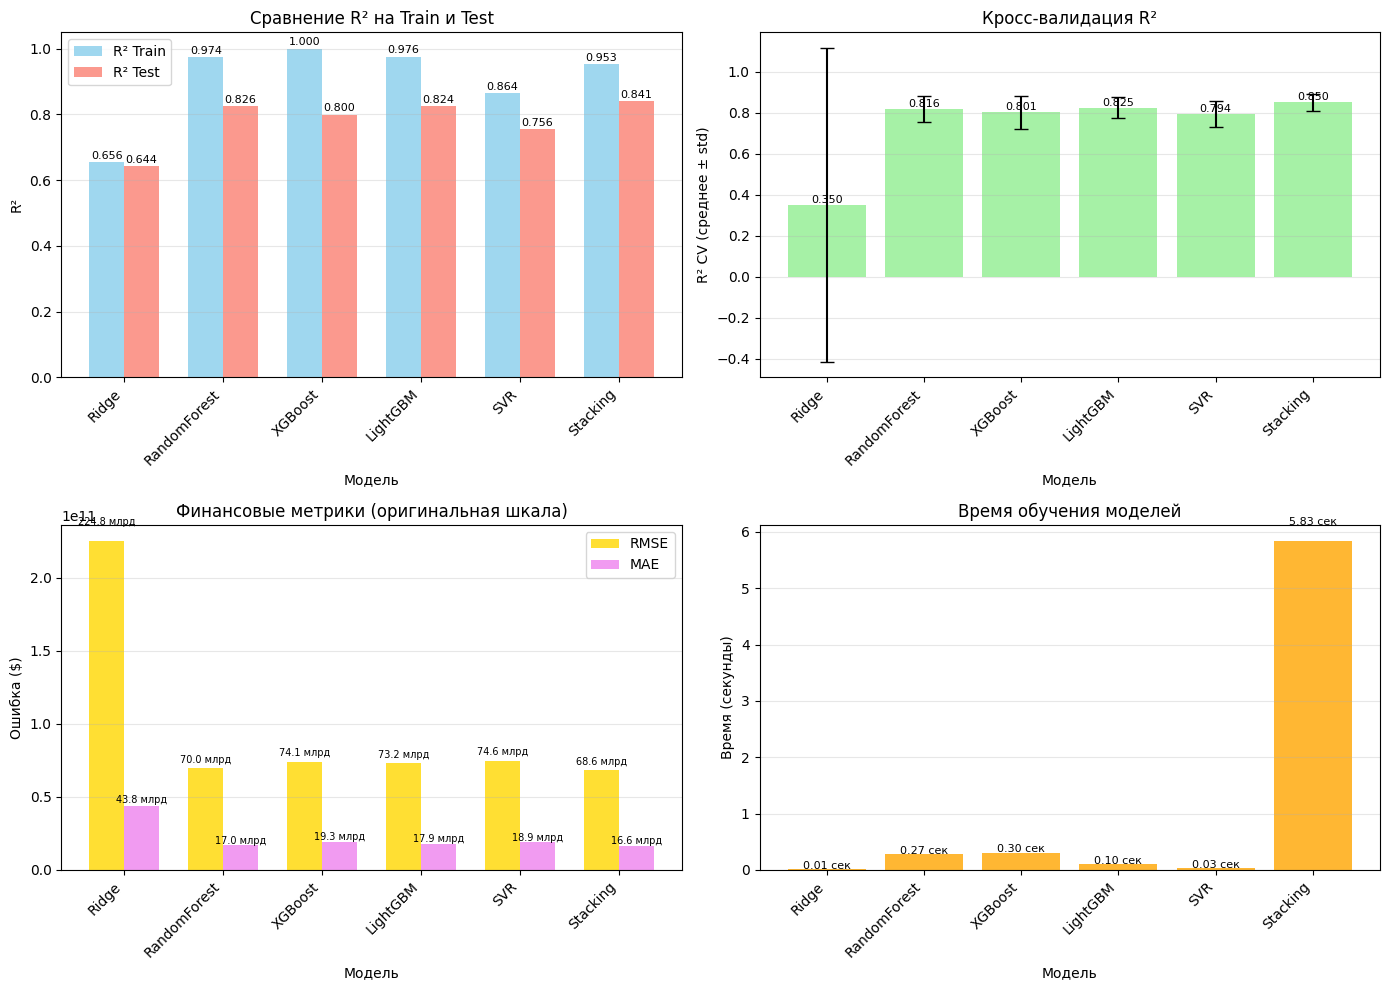

СВОДНАЯ ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ
      Модель R² Train R² Test R² CV mean R² CV std          RMSE          MAE   MAPE    Время
       Ridge   0.6555  0.6437     0.3504   ±0.7651 224.79 млрд $ 43.81 млрд $ 67.96% 0.01 сек
RandomForest   0.9739  0.8255     0.8165   ±0.0643  69.95 млрд $ 16.97 млрд $ 34.69% 0.27 сек
     XGBoost   1.0000  0.7996     0.8014   ±0.0812  74.12 млрд $ 19.27 млрд $ 37.00% 0.30 сек
    LightGBM   0.9757  0.8244     0.8249   ±0.0530  73.25 млрд $ 17.93 млрд $ 35.08% 0.10 сек
         SVR   0.8643  0.7562     0.7939   ±0.0643  74.64 млрд $ 18.91 млрд $ 35.81% 0.03 сек
    Stacking   0.9534  0.8407     0.8501   ±0.0433  68.57 млрд $ 16.58 млрд $ 30.75% 5.83 сек

ЛУЧШАЯ МОДЕЛЬ ПО R² TEST: Stacking
R² Test: 0.8407
R² CV: 0.8501 ± 0.0433
RMSE: 68.57 млрд $
MAPE: 30.75%
Время обучения: 5.83 сек


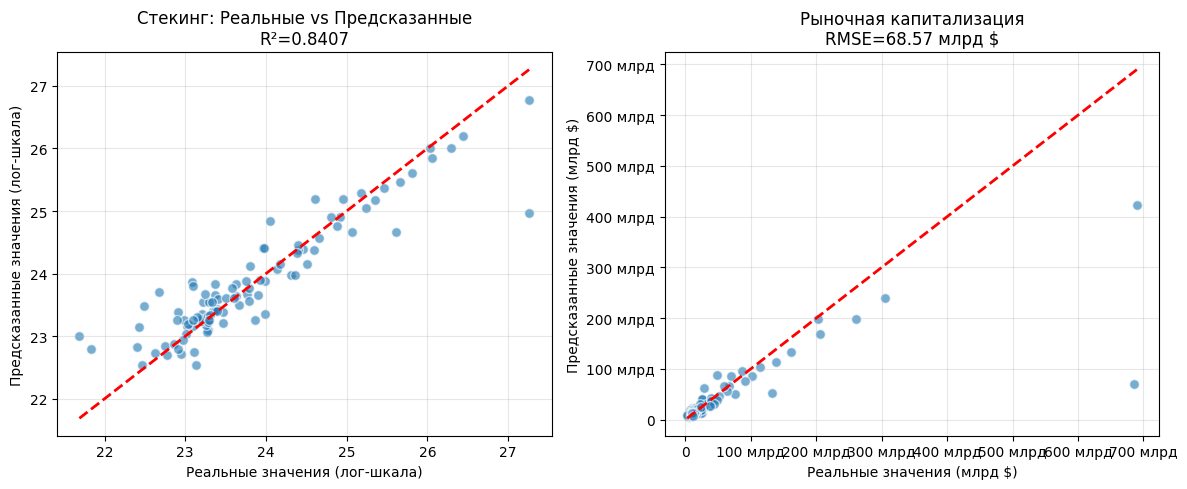


ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ СТЕКИНГА:
RIDGE:
  Параметры: {'alpha': 0.0001041542274471566}
  Лучший R² (Optuna): 0.3683

RF:
  Параметры: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 3}
  Лучший R² (Optuna): 0.8172

XGB:
  Параметры: {'n_estimators': 168, 'max_depth': 4, 'learning_rate': 0.08505690285346648}
  Лучший R² (Optuna): 0.8294

LGBM:
  Параметры: {'n_estimators': 131, 'learning_rate': 0.047453665341612446, 'num_leaves': 47}
  Лучший R² (Optuna): 0.8248

SVR:
  Параметры: {'C': 7.181093680809556, 'epsilon': 0.1419345665664139}
  Лучший R² (Optuna): 0.8329

ФИНАЛЬНЫЙ ОТЧЕТ

СТЕКИНГ МОДЕЛЬ:
• R² Train: 0.9534
• R² Test: 0.8407
• R² CV: 0.8501 ± 0.0433
• RMSE: 68.57 млрд $
• MAE: 16.58 млрд $
• MAPE: 30.75%
• Время обучения: 5.83 сек

СРАВНЕНИЕ С ЛУЧШЕЙ БАЗОВОЙ МОДЕЛЬЮ (RandomForest):
• Улучшение R² Test: +1.52%
• Улучшение RMSE: +2.0%
• Улучшение MAPE: +3.9%

Доступные модели в results:
  • Ridge: results['Ridge']['model']
  • RandomForest: results['RandomForest']['model

In [175]:
# Основной блок выполнения
print("СТЕКИНГ-РЕГРЕССИЯ С СРАВНЕНИЕМ МОДЕЛЕЙ")
print("=" * 60)
    
# Информация о данных
print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")
        
# Обучение и оценка
results, best_params, best_scores, X_train, X_test, y_train, y_test = train_and_evaluate(X, y)
        
# Визуализация сравнения
plot_comparison_results(results)
        
# Визуализация предсказаний стекинга
plot_stacking_predictions(results, X_test, y_test)
        
# Вывод лучших параметров
print("\n" + "=" * 60)
print("ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ СТЕКИНГА:")
print("=" * 60)

for model_name, params in best_params.items():
    print(f"{model_name.upper()}:")
    print(f"  Параметры: {params}")
    print(f"  Лучший R² (Optuna): {best_scores[model_name]:.4f}")
    print()
        
print("ФИНАЛЬНЫЙ ОТЧЕТ")
stacking = results['Stacking']

print(f"\nСТЕКИНГ МОДЕЛЬ:")
print(f"• R² Train: {stacking['R2_train']:.4f}")
print(f"• R² Test: {stacking['R2_test']:.4f}")
print(f"• R² CV: {stacking['R2_CV_mean']:.4f} ± {stacking['R2_CV_std']:.4f}")
print(f"• RMSE: {format_currency(stacking['RMSE_original'])}")
print(f"• MAE: {format_currency(stacking['MAE_original'])}")
print(f"• MAPE: {stacking['MAPE_original']:.2f}%")
print(f"• Время обучения: {stacking['Train_time']:.2f} сек")
        
# Сравнение с лучшей базовой моделью
base_models = [m for m in results.keys() if m != 'Stacking']
best_base = max(base_models, key=lambda m: results[m]['R2_test'])
best_base_result = results[best_base]
        
print(f"\nСРАВНЕНИЕ С ЛУЧШЕЙ БАЗОВОЙ МОДЕЛЬЮ ({best_base}):")
print(f"• Улучшение R² Test: {(stacking['R2_test'] - best_base_result['R2_test'])*100:+.2f}%")
print(f"• Улучшение RMSE: {((best_base_result['RMSE_original'] - stacking['RMSE_original']) / best_base_result['RMSE_original'])*100:+.1f}%")
print(f"• Улучшение MAPE: {best_base_result['MAPE_original'] - stacking['MAPE_original']:+.1f}%")

# Возврат результатов для дальнейшего использования
print(f"\nДоступные модели в results:")
for model_name in results.keys():
    print(f"  • {model_name}: results['{model_name}']['model']")

# SHAP анализ для лучшей модели


In [176]:
stacking_pipeline = results['Stacking']['model']

In [177]:
def prepare_shap_data(stacking_pipeline, X_train, X_test):
    # Получаем предобработчик из пайплайна
    preprocessor = stacking_pipeline.named_steps['preprocessor']
    
    # Применяем предобработку
    X_train_processed = preprocessor.transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Получаем имена признаков
    # Предполагаем, что numerical_features уже определен
    feature_names = numerical_features
    
    print(f"   Размер X_train_processed: {X_train_processed.shape}")
    print(f"   Размер X_test_processed: {X_test_processed.shape}")
    print(f"   Количество признаков: {len(feature_names)}")
    
    return X_train_processed, X_test_processed, feature_names

def create_shap_explainer(stacking_pipeline, X_train_processed, sample_size=100):
    print("\n2. СОЗДАНИЕ SHAP EXPLAINER...")
    
    # Получаем финальную модель из стекинга
    stacking_model = stacking_pipeline.named_steps['regressor']
    
    # Используем KernelSHAP для стекинг-модели
    print("   Используем KernelSHAP...")
    
    # Выбираем фоновые данные (первые sample_size строк)
    background_size = min(sample_size, X_train_processed.shape[0])
    background = X_train_processed[:background_size]
    
    # Создаем функцию предсказания для стекинг-модели
    def model_predict(X):
        return stacking_model.predict(X)
    
    # Создаем explainer
    explainer = shap.KernelExplainer(
        model_predict,
        background,
        link="identity"
    )
    
    print(f"   Размер фоновых данных: {background.shape}")
    print(f"   Тип explainer: KernelSHAP")
    
    return explainer

def compute_shap_values(explainer, X_test_processed, sample_size=None):
    print("\n3. ВЫЧИСЛЕНИЕ SHAP ЗНАЧЕНИЙ...")
    
    start_time = time.time()
    
    # Ограничиваем размер выборки для скорости
    if sample_size is None:
        sample_size = min(100, X_test_processed.shape[0])
    
    X_sample = X_test_processed[:sample_size]
    
    # Вычисляем SHAP значения
    shap_values = explainer.shap_values(X_sample, nsamples=100)
    
    computation_time = time.time() - start_time
    print(f"   Время вычисления: {computation_time:.2f} сек")
    print(f"   Размер выборки для SHAP: {sample_size}")
    
    return shap_values, X_sample

def analyze_shap_results(shap_values, X_sample, feature_names):
    """Анализ результатов SHAP"""
    print("\n4. АНАЛИЗ РЕЗУЛЬТАТОВ SHAP...")
    
    # Средняя абсолютная важность признаков
    feature_importance = np.abs(shap_values).mean(0)
    
    # Создаем DataFrame с важностью признаков
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("\nТОП-10 ВАЖНЫХ ПРИЗНАКОВ ПО SHAP:")
    print("=" * 60)
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:30s}: {row['importance']:.4f}")
    
    return importance_df

def plot_shap_visualizations(shap_values, X_sample, feature_names, importance_df, explainer):
    print("\n5. ПОСТРОЕНИЕ ВИЗУАЛИЗАЦИЙ...")
    
    fig = plt.figure(figsize=(15, 10))
    
    try:
        # 1. Summary plot (важность признаков)
        ax1 = plt.subplot(2, 2, 1)
        shap.summary_plot(shap_values, X_sample, feature_names=feature_names, 
                         max_display=10, show=False, plot_size=None)
        plt.title("SHAP: Важность признаков (Top-10)", fontsize=12, fontweight='bold')
    except Exception as e:
        print(f"   Ошибка в summary_plot: {e}")
        plt.text(0.5, 0.5, f"Summary Plot Error:\n{str(e)}", 
                ha='center', va='center', transform=ax1.transAxes)
    
    # 2. Bar plot (средняя абсолютная важность)
    plt.subplot(2, 2, 2)
    top_features = importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['importance'][::-1])
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Средняя абсолютная важность (SHAP)')
    plt.title('Топ-10 важных признаков', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    try:
        # 3. Force plot для первого наблюдения
        plt.subplot(2, 2, 3)
        shap.force_plot(
            explainer.expected_value,
            shap_values[0], 
            X_sample[0], 
            feature_names=feature_names,
            matplotlib=True,
            show=False
        )
        plt.title(f'Force Plot: 1-е наблюдение\nSHAP = {shap_values[0].sum():.3f}', 
                 fontsize=12, fontweight='bold')
    except Exception as e:
        print(f"   Ошибка в force_plot: {e}")
    
    try:
        # 4. Dependence plot для топ-1 признака
        plt.subplot(2, 2, 4)
        top_feature = importance_df.iloc[0]['feature']
        top_feature_idx = list(feature_names).index(top_feature)
        
        shap.dependence_plot(
            top_feature_idx,
            shap_values,
            X_sample,
            feature_names=feature_names,
            show=False
        )
        plt.title(f'Dependence Plot: {top_feature}', fontsize=12, fontweight='bold')
    except Exception as e:
        print(f"   Ошибка в dependence_plot: {e}")
    
    plt.tight_layout()
    plt.savefig('shap_analysis_stacking.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Визуализации сохранены в 'shap_analysis_stacking.png'")

def interpret_shap_results(importance_df, shap_values, X_sample, feature_names, explainer):
    print("\n" + "=" * 70)
    print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ SHAP")
    print("=" * 70)
    
    # Анализ направления влияния
    print("\n1. НАПРАВЛЕНИЕ ВЛИЯНИЯ ПРИЗНАКОВ:")
    
    top_5_features = importance_df.head(5)['feature'].values
    
    for feature in top_5_features:
        try:
            feature_idx = list(feature_names).index(feature)
            # Среднее SHAP значение (знак показывает направление)
            mean_shap = shap_values[:, feature_idx].mean()
            direction = "увеличивает" if mean_shap > 0 else "уменьшает"
            print(f"   • {feature}: {direction} предсказание")
            print(f"     (среднее SHAP: {mean_shap:+.4f})")
        except:
            print(f"   • {feature}: не удалось проанализировать")
    
    try:
        # Получаем предсказания для той же выборки
        stacking_model = stacking_pipeline.named_steps['regressor']
        predictions = stacking_model.predict(X_sample)
        
        # Сумма SHAP значений
        shap_sum = np.sum(shap_values, axis=1)
        
        # Корреляция между суммой SHAP + базовое значение и предсказаниями
        correlation = np.corrcoef(predictions, shap_sum + explainer.expected_value)[0, 1]
        
        print(f"   Корреляция SHAP с предсказаниями: {correlation:.6f}")
        print(f"   {'✓ SHAP значения корректны' if correlation > 0.99 else '⚠️ Возможные проблемы с SHAP'}")
        print(f"   Базовое значение (ожидаемый вывод): {explainer.expected_value:.4f}")
    except Exception as e:
        print(f"   Ошибка при проверке корректности: {e}")

def perform_complete_shap_analysis(stacking_pipeline, X_train, X_test, numerical_features):
    """Полный SHAP анализ для Stacking модели"""
    
    # 1. Подготовка данных
    X_train_processed, X_test_processed, feature_names = prepare_shap_data(
        stacking_pipeline, X_train, X_test
    )
    
    # 2. Создание explainer
    explainer = create_shap_explainer(stacking_pipeline, X_train_processed, sample_size=50)
    
    # 3. Вычисление SHAP значений
    shap_values, X_sample = compute_shap_values(explainer, X_test_processed, sample_size=50)
    
    # 4. Анализ результатов
    importance_df = analyze_shap_results(shap_values, X_sample, feature_names)
    
    # 5. Визуализации
    plot_shap_visualizations(shap_values, X_sample, feature_names, importance_df, explainer)
    
    # 6. Интерпретация
    interpret_shap_results(importance_df, shap_values, X_sample, feature_names, explainer)
    
    return {
        'explainer': explainer,
        'shap_values': shap_values,
        'importance_df': importance_df,
        'X_sample': X_sample,
        'feature_names': feature_names
    }


   Размер X_train_processed: (404, 16)
   Размер X_test_processed: (101, 16)
   Количество признаков: 16

2. СОЗДАНИЕ SHAP EXPLAINER...
   Используем KernelSHAP...
   Размер фоновых данных: (50, 16)
   Тип explainer: KernelSHAP

3. ВЫЧИСЛЕНИЕ SHAP ЗНАЧЕНИЙ...


  0%|          | 0/50 [00:00<?, ?it/s]

   Время вычисления: 20.87 сек
   Размер выборки для SHAP: 50

4. АНАЛИЗ РЕЗУЛЬТАТОВ SHAP...

ТОП-10 ВАЖНЫХ ПРИЗНАКОВ ПО SHAP:
 1. Log_Earnings                  : 0.5431
 2. Log_EBITDA                    : 0.1622
 3. Volatility                    : 0.1515
 4. Log_Book                      : 0.1102
 5. Earnings/Share                : 0.0647
 6. Dividend Yield                : 0.0456
 7. Sector_Information Technology : 0.0317
 8. Sector_Consumer Staples       : 0.0216
 9. Sector_Energy                 : 0.0176
10. Log_Sales                     : 0.0164

5. ПОСТРОЕНИЕ ВИЗУАЛИЗАЦИЙ...


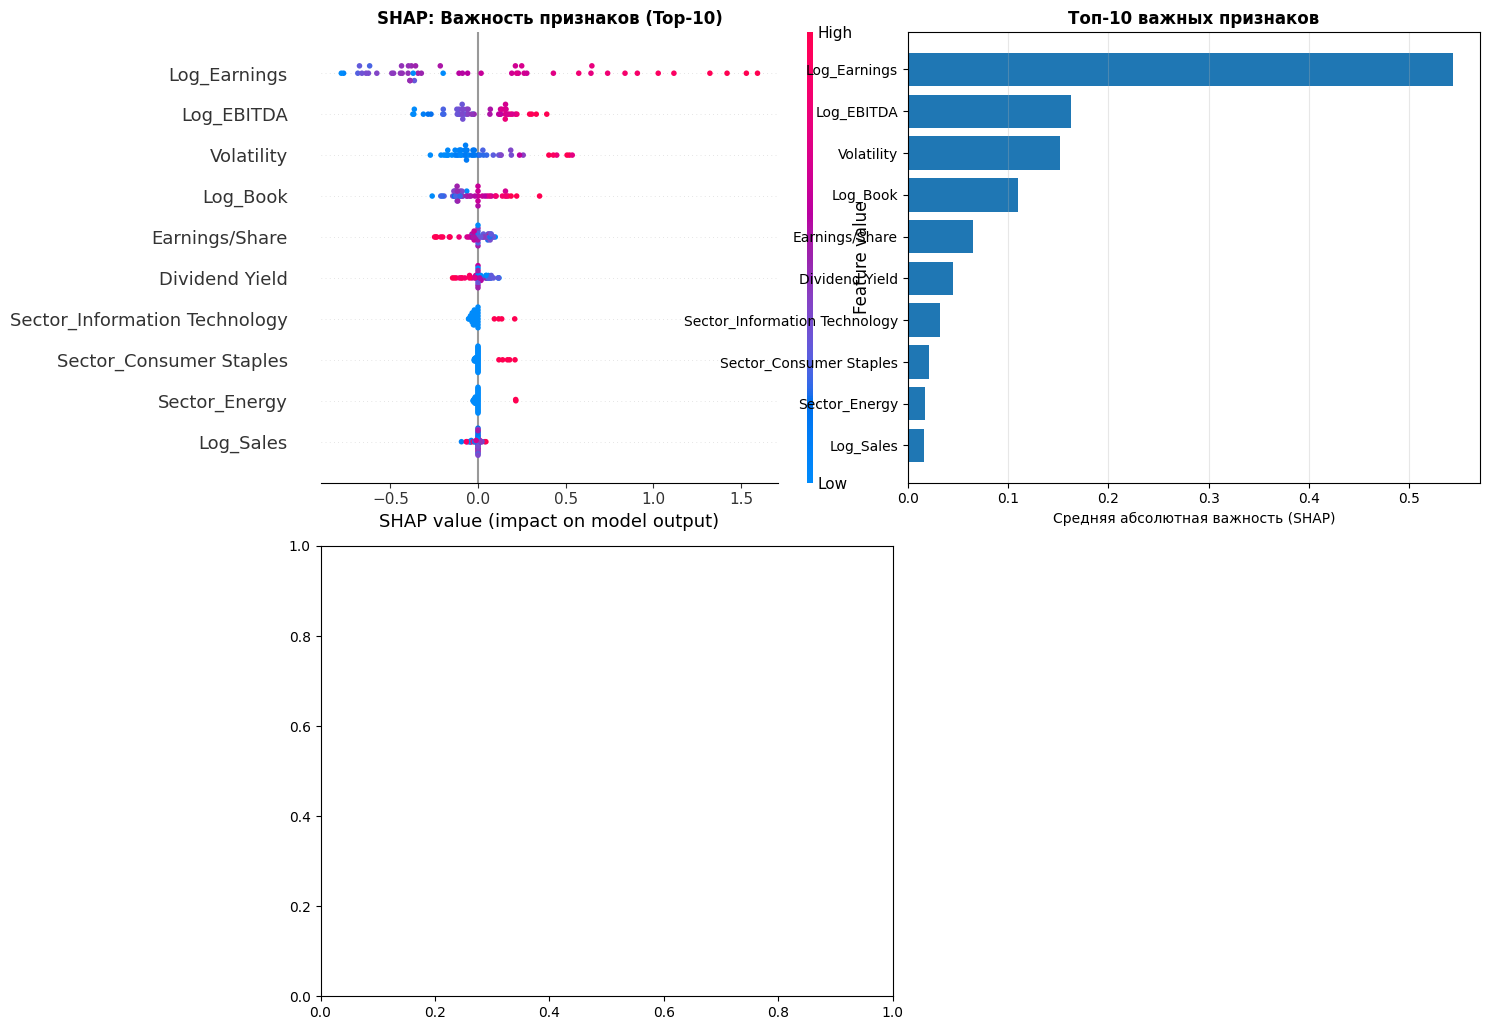

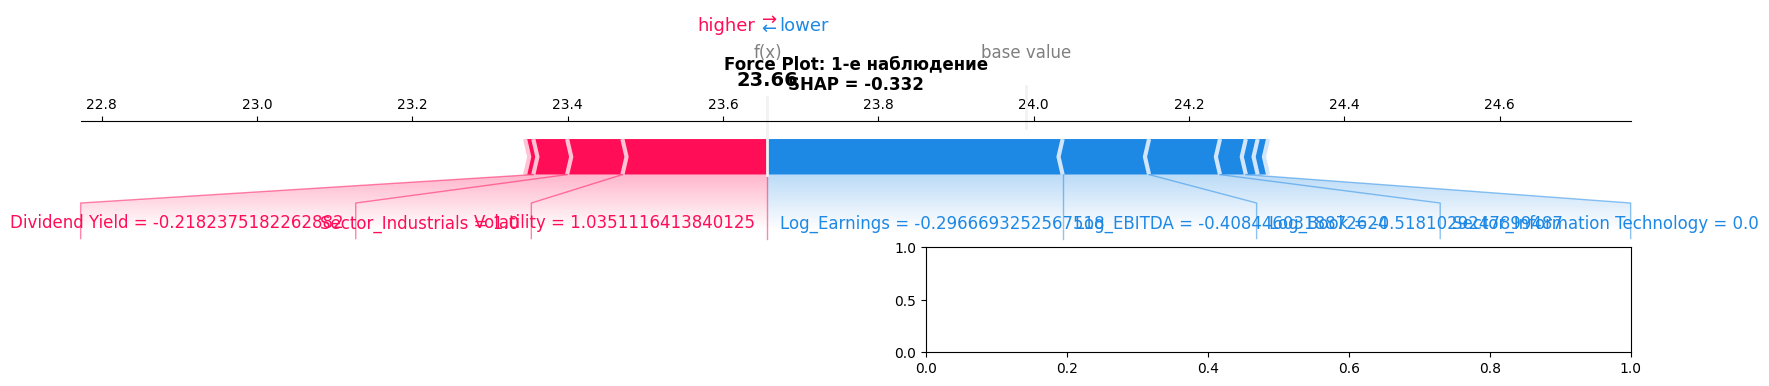

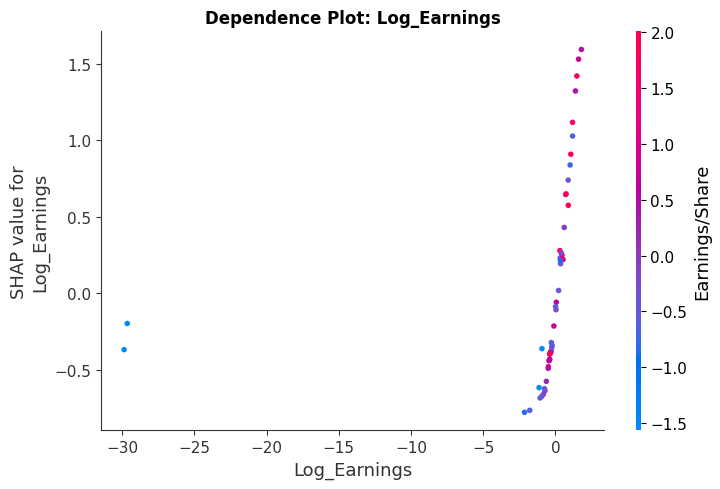


✓ Визуализации сохранены в 'shap_analysis_stacking.png'

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ SHAP

1. НАПРАВЛЕНИЕ ВЛИЯНИЯ ПРИЗНАКОВ:
   • Log_Earnings: увеличивает предсказание
     (среднее SHAP: +0.0356)
   • Log_EBITDA: уменьшает предсказание
     (среднее SHAP: -0.0004)
   • Volatility: увеличивает предсказание
     (среднее SHAP: +0.0209)
   • Log_Book: уменьшает предсказание
     (среднее SHAP: -0.0299)
   • Earnings/Share: уменьшает предсказание
     (среднее SHAP: -0.0132)
   Корреляция SHAP с предсказаниями: 1.000000
   ✓ SHAP значения корректны
   Базовое значение (ожидаемый вывод): 23.9896

SHAP АНАЛИЗ ЗАВЕРШЕН!

Результаты доступны в shap_results:
  • shap_results['importance_df'] - важность признаков
  • shap_results['shap_values'] - значения SHAP
  • shap_results['explainer'] - SHAP explainer


In [178]:
# Основной блок выполнения
if __name__ == "__main__":
    # Проверяем, что все необходимые объекты определены
    required_vars = ['stacking_pipeline', 'X_train', 'X_test', 'numerical_features']
    
    missing_vars = []
    for var in required_vars:
        if var not in globals():
            missing_vars.append(var)
    
    if missing_vars:
        print(f"ОШИБКА: Не определены переменные: {missing_vars}")
        print("Пожалуйста, определите перед запуском:")
        print("  - stacking_pipeline: обученная стекинг-модель")
        print("  - X_train, X_test: данные (уже предобработанные)")
        print("  - numerical_features: список числовых признаков")
        
        # Попробуем найти stacking_pipeline в base_results
        if 'base_results' in globals() and 'Stacking' in results:
            print("\nНайден base_results, извлекаю stacking_pipeline...")
            stacking_pipeline = results['Stacking']['model']
            print("✓ Stacking pipeline извлечен из base_results")
            
            # Проверяем остальные переменные
            if 'X_train' not in globals() or 'X_test' not in globals():
                print("⚠️ X_train/X_test не определены, используем фиктивные данные для демонстрации")
                X_train = pd.DataFrame(np.random.randn(100, 10))
                X_test = pd.DataFrame(np.random.randn(20, 10))
                numerical_features = list(X_train.columns)
                
            # Запускаем SHAP анализ
            shap_results = perform_complete_shap_analysis(
                stacking_pipeline, X_train, X_test, numerical_features
            )
        else:
            print("\nbase_results также не найден. Запустите сначала train_and_evaluate().")
    else:
        # Запускаем SHAP анализ
        shap_results = perform_complete_shap_analysis(
            stacking_pipeline, X_train, X_test, numerical_features
        )
        
        print("\n" + "=" * 70)
        print("SHAP АНАЛИЗ ЗАВЕРШЕН!")
        print("=" * 70)
        
        # Сохраняем результаты для дальнейшего использования
        print("\nРезультаты доступны в shap_results:")
        print("  • shap_results['importance_df'] - важность признаков")
        print("  • shap_results['shap_values'] - значения SHAP")
        print("  • shap_results['explainer'] - SHAP explainer")